# Project 1: SAT & ACT Analysis

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used are added here*

In [1]:
#Imports:
import numpy as np

import pandas as pd

import seaborn as sns

# Importing matplotlib.pyplot - the specific plotting API 
# https://matplotlib.org/api/pyplot_api.html
import matplotlib.pyplot as plt

# This magic line will allow you to generate plots
# within the Jupyter note book.
%matplotlib inline

#Source: Matt Brems, http://localhost:8878/notebooks/2.03-lesson-principles_of_data_visualization/starter-code.ipynb

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017 = pd.read_csv('../data/sat_2017.csv') 
act_2017 = pd.read_csv('../data/act_2017.csv') 

#Source for importing files: Drew Dyson recommended using ../ to go back one directory to grab data
#or can go to the file and right click on it and copy file path and past into ()

#Source of 2017 SAT data: Kate Sundquist, https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/
#Source of 2017 ACT data: Halle Edwards, https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
print(sat_2017.head(10))
#sat_2017
#print(act_2017.head(10)) #decided to display this one cell down to make it easier to reference

                  State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  

In [4]:
print(act_2017.head(10))

                  State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2  


In [5]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [6]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:
The SAT score data set includes state names (data type: objects), state participation (data type: objects, in this case: percentages), evidence-based reading and writing scores (data type:integers), math scores (data type: integers), and total scores (data type: integers) for 51 states (all 50 U.S. states as well as District of Columbia). 

The ACT score data set includes state names (data type: objects), state participation (data type: objects, in this case: percentages), English scores (data type: floats), math scores (data type: floats), reading scores (data type: floats), science scores (data type: floats), and composite scores (data type: objects) for 51 states (all 50 U.S. states as well as the District of Columbia).  The ACT score data set also includes the national average participation, English score, math score, reading score, science score, and composite score.  

Note that the ACT composite score data type should be a float, but it became an object data type because there is a typo in the Wyoming composite score: there is an "x" following the composite score (the composite score is recorded as "20.2x" instead of what should probably be "20.2").    

#### 4a. Does the data look complete? 

Answer:
The SAT score data looks complete, but it would be helpful if the SAT score data included national average data (since the ACT score data included national average data).    

The ACT score data looks complete, but now that there is an option to take the writing section, it would be interesting to add a column for state and national participation in the writing test and average state and national writing scores.  According to "Complete List: Which Colleges Require ACT Writing? 100+ Schools," some but not all universities require the ACT writing test (source: Mary Ann Barge, https://blog.prepscholar.com/complete-list-which-colleges-require-act-writing-all-schools).  For the purposes of this project, it appears that the following scores will be informative enough for general purposes: English, mathematics, reading, and science scores as well as the composite scores (average of the four test scores (English, math, reading, and science) rounded to the whole number for each student).    

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 
The SAT score data that was imported into this notebook was compared with the SAT score data from the source of the data (https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/).  It was found that the average math score in Maryland was erroneously recorded as 52 instead of 524.  Also, the national averages were not included in the SAT data that was imported into this notebook.

The ACT score data that was imported into this notebook was compared with the ACT score data from the source of the data (https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows).  It was found that the average science score in Maryland was erroniously recorded as 2.3 instead of 23.2.  Also, the average composite score for Wyoming was erroneously recorded as 20.2x instead of 20.2.  This error also caused the datatype of this data to become an object instead of a float. 
(ASK: include the Google Sheet used to find this info???)

The minimum (min) and maximum (max) possible values for each subtest and overall test are below:
SAT: Evidence-Based Reading and Writing score min: 200,    SAT math score min: 200     
SAT: Evidence-Based Reading and Writing score max: 800,    SAT math score max: 800     
Minimum total score for SAT test: 400
Maximum total score for SAT test: 1600
Source: Hannah Muniz, https://blog.prepscholar.com/sat-score-range

ACT: English score min: 1,     math score min: 1,     reading score min: 1,     science score min: 1 
ACT: English score min: 36,    math score min: 36,    reading score min: 36,    science score min: 36
Minimum total score for ACT test: 1
Maximum total score for ACT test: 36
Source: Halle Edwards, https://blog.prepscholar.com/how-is-the-act-scored

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [7]:
#Fixing error in SAT dataset (the average math score in Maryland should be 524 instead of 52):
#Check location first:
sat_2017[sat_2017['State'] == 'Maryland']['Math']

20    52
Name: Math, dtype: int64

In [8]:
sat_2017.loc[ (sat_2017['State'] == 'Maryland') , 'Math'] = 524
#Checking did what wanted to do:
sat_2017[sat_2017['State'] == 'Maryland']['Math']

#Source of learning .loc method: 
#Dave Yerrington, http://localhost:8886/notebooks/2.01-2.02-intro-to-pandas/intro-to-pandas-2.ipynb 

20    524
Name: Math, dtype: int64

In [9]:
#Fixing 1st error in ACT dataset (the average science score in Maryland should be 23.2 instead of 2.3):
#Check location first:
act_2017.loc[ (act_2017['State'] == 'Maryland'), 'Science']

21    2.3
Name: Science, dtype: float64

In [10]:
act_2017.loc[ (act_2017['State'] == 'Maryland'), 'Science'] = 23.2
#Checking did what wanted to do:
act_2017.loc[ (act_2017['State'] == 'Maryland'), 'Science']

#Source of learning .loc method: 
#Dave Yerrington, http://localhost:8886/notebooks/2.01-2.02-intro-to-pandas/intro-to-pandas-2.ipynb

21    23.2
Name: Science, dtype: float64

In [11]:
#Fixing 2nd error in ACT dataset (the average composite score in Wyoming should be 20.2 instead of 20.2x):
#Check location first:
act_2017.loc[ (act_2017['State'] == 'Wyoming'), 'Composite']


51    20.2x
Name: Composite, dtype: object

In [12]:
act_2017.loc[ (act_2017['State'] == 'Wyoming'), 'Composite'] = 20.2
#Checking did what wanted to do:
act_2017.loc[ (act_2017['State'] == 'Wyoming'), 'Composite']

#Source of learning .loc method: 
#Dave Yerrington, http://localhost:8886/notebooks/2.01-2.02-intro-to-pandas/intro-to-pandas-2.ipynb

51    20.2
Name: Composite, dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [13]:
sat_2017.dtypes

#Learned about dtypes during following lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [14]:
act_2017.dtypes

#Learned about dtypes during following lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
sat_2017 dataset:
It was expected that the Evidence-Based Reading and Writing, Math, and Total score values would be integers and that the state values would be objects.  It appears that the Participation values are object data types.  They are percentages, and Pandas read them in as objects rather than integers or floats.  These values could be divided by 100% to give decimal form representations of percentages.  

act_2017 dataset:
It was expected that the English, Math, Reading, and Science score values would be floats and that the state values would be objects.  It appears that the Participation values are object data types.  They are percentages, and Pandas read them in as objects rather than integers or floats.  These values could be divided by 100% to give decimal form representations of percentages.  It also appears that the Composite score values are still objects, even after the value of "20.2x" (for the state of Wyoming) was corrected to "20.2."  The Composite score values should be changed to the float data type.  

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [15]:
def participation_decimals(data_frame):
    #Removing % from each Participation percentage (for each state and national value)
    data_frame['Participation'] = data_frame['Participation'].map( lambda participation_elem: participation_elem.replace('%','') )
    #Changing the data type from object to float
    data_frame['Participation'] = data_frame['Participation'].astype(float)
    #Dividing each value by 100 to get decimal representing percent / 100%
    data_frame['Participation'] = [ element/100 for element in data_frame['Participation'] ]

    return data_frame

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 

In [16]:
#Check before reassign sat_2017 dataframe:
#participation_decimals(data_frame = sat_2017)

#After checking, reassigning sat_2017 dataframe to updated dataframe:
sat_2017 = participation_decimals(data_frame = sat_2017) 
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [17]:
#Check before reassign act_2017 dataframe:
#participation_decimals(data_frame = act_2017)

#After checking, reassigning act_2017 dataframe to updated dataframe:
act_2017 = participation_decimals(data_frame = act_2017)
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


- Fix any individual values preventing other columns from being the appropriate type.

In [18]:
#Checking
#sat_2017.dtypes

In [19]:
#Checking
#act_2017.dtypes

In [20]:
#Fixed value in act_2017 earlier (see end of Section 4 and code that is commented below), 
#but need to ensure Composite column has values of type float:

# act_2017.loc[ (act_2017['State'] == 'Wyoming'), 'Composite'] = 20.2
# #Checking did what wanted to do:
# act_2017.loc[ (act_2017['State'] == 'Wyoming'), 'Composite']

# #Source of learning .loc method: 
# #Dave Yerrington, http://localhost:8886/notebooks/2.01-2.02-intro-to-pandas/intro-to-pandas-2.ipynb

- Finish your data modifications by making sure the columns are now typed appropriately.

In [21]:
#Changing act_2017 'Composite' column values from objects to floats:
#act_2017['Composite'].astype(float) #checked this and ready to reassign 'Composite' series values to floats
act_2017['Composite'] = act_2017['Composite'].astype(float)

- Display the data types again to confirm they are correct.

In [22]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [23]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [24]:
new_columns_dict_sat_2017 = {
        'State'                             : 'state', 
        'Participation'                     : 'sat_participation_2017',
        'Evidence-Based Reading and Writing': 'sat_reading_writing_scr_2017',
        'Math'                              : 'sat_math_scr_2017',
        'Total'                             : 'sat_total_scr_2017'
    }

sat_2017.rename(columns = new_columns_dict_sat_2017, inplace = True)

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 

In [25]:
#Check columns:
sat_2017.head()

,state,sat_participation_2017,sat_reading_writing_scr_2017,sat_math_scr_2017,sat_total_scr_2017
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [26]:
new_columns_dict_act_2017 = {
        'State'             : 'state', 
        'Participation'     : 'act_participation_2017',
        'English'           : 'act_english_scr_2017',
        'Math'              : 'act_math_scr_2017',
        'Reading'           : 'act_reading_scr_2017',
        'Science'           : 'act_science_scr_2017',
        'Composite'         : 'act_composite_scr_2017'
    }

act_2017.rename(columns = new_columns_dict_act_2017, inplace = True)

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 

In [27]:
#Check columns:
act_2017.head()

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT or SAT|A state in the United States of America (or the District of Columbia)| 
|act_participation_2017|float|ACT(2017)|The proportion of graduates who participated in the ACT in 2017 to total graduates in 2017 for each respective state|
|act_english_scr_2017|float|ACT(2017)|The average ACT English score for the respective state in 2017|
|act_math_scr_2017|float|ACT(2017)|The average ACT math score for the respective state in 2017|
|act_reading_scr_2017|float|ACT(2017)|The average ACT reading score for the respective state in 2017|
|act_science_scr_2017|float|ACT(2017)|The average ACT science score for the respective state in 2017|
|act_composite_scr_2017|float|ACT(2017)|The average ACT composite score for the respective state in 2017|
|sat_participation_2017|float|SAT(2017)|The proportion of graduates who participated in the SAT in 2017 to total graduates in 2017 for each respective state|
|sat_reading_writing_scr_2017|int|SAT(2017)|The average SAT evidence-based reading and writing score for the respective state in 2017|
|sat_math_scr_2017|int|SAT(2017)|The average SAT math score for the respective state in 2017|
|sat_total_scr_2017|int|SAT(2017)|The average total SAT score for the respective state in 2017|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [28]:
#I think it would make sense to remove the first row in the act_2017 dataframe because we are comparing state test
#score data to each other rather to the national average data.  Also, the sat_2017 dataframe (and the source the 
#data came from) does not contain all of the necessary national average data.  Therefore, it would make sense to 
#narrow down our focus to analyzing state data.

#Checking what will happen once add inplace = True:
#act_2017.drop([0]) #removing national averages which are in the first row (0th index) of act_2017

act_2017.drop([0], inplace = True) #removing national averages which are in the first row (0th index) of act_2017

#Checking:
act_2017.head()

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


In [49]:
#Checking size of act_2017 dataframe
act_2017.shape #51 rows and 7 columns makes sense

#Source for review of using ".shape":
#https://stackoverflow.com/questions/17468878/pandas-python-how-to-count-the-number-of-records-or-rows-in-a-dataframe

(51, 7)

In [50]:
#Checking size of sat_2017 dataframe
sat_2017.shape #51 rows and 5 columns makes sense

#Source for review of using ".shape":
#https://stackoverflow.com/questions/17468878/pandas-python-how-to-count-the-number-of-records-or-rows-in-a-dataframe

(51, 5)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [29]:
#Checked output and then supressed result becuase it takes a lot of space in Jupyter notebook:
#pd.merge(left = act_2017, right = sat_2017, on = 'state');

act_sat_2017 = pd.merge(left = act_2017, right = sat_2017, on = 'state');
#Checking merged dataframes as desired:
act_sat_2017.head()

#Used the following Pandas documentation:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017,sat_participation_2017,sat_reading_writing_scr_2017,sat_math_scr_2017,sat_total_scr_2017
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


In [51]:
#Checking size of act_sat_2017 dataframe
act_sat_2017.shape #51 rows and 5 + 7 - 1(extra state column) = 11 columns makes sense

#Source for review of using ".shape":
#https://stackoverflow.com/questions/17468878/pandas-python-how-to-count-the-number-of-records-or-rows-in-a-dataframe

(51, 11)

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [45]:
#Saving cleaned, mearged dataframe (2017 ACT and SAT data) to combined_2017.csv using relative path
act_sat_2017.to_csv('../data/combined_2017.csv')
#Checked the local data file, and "combined_2017.csv" is located there (after running this cell)

#Source for figure out how to save dataframe to csv:
#https://chrisalbon.com/python/data_wrangling/pandas_saving_dataframe_as_csv/

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [31]:
#ACT data:
#Note that only participation and composite scores were available in the references given.

#SAT data:
#Note that Puerto Rico and the US Virgin Islands were not included because they were not included in the 2017 ACT 
#and SAT datasets
#Also note that total scores were taken from the source and sometimes did not add up to the raw sum 
#(due to rounding differences, likely) - used the values from the source
#Worked with Denver DSI cohort to compile sat_2018 data (especially worked with Anna Haas)

#Checked data was clean (no errors) by checking each data point matched the values in the sources
#Source of 2018 ACT data: ACT.org, http://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf
#Source of 2018 SAT data: CollegeBoard, https://reports.collegeboard.org/sat-suite-program-results/state-results

#Also checked no extra rows or columns of data (no need to remove rows or columns of data)


In [32]:
#Importing 2018 ACT data that was recently created and saved in the data folder of this local directory
act_2018 = pd.read_csv('../data/act_2018.csv') 
#Checking imported file correctly:
act_2018.head()

,State,Participation,Composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [33]:
#Importing 2018 SAT data that was recently created and saved in the data folder of this local directory
sat_2018 = pd.read_csv('../data/sat_2018.csv') 
#Checking imported file correctly:
sat_2018.head()

,State,Participation,EvBasedReadingAndWriting,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [34]:
#Checking datatypes of act_2018 dataframe:
act_2018.dtypes
#The datatypes match the desired datatypes (match the applicable datatypes of act_2017)

State             object
Participation    float64
Composite        float64
dtype: object

In [35]:
#Checking datatypes of sat_2018 dataframe:
sat_2018.dtypes
#The datatypes match the desired datatypes (match the datatypes of sat_2017)

State                        object
Participation               float64
EvBasedReadingAndWriting      int64
Math                          int64
Total                         int64
dtype: object

In [36]:
#Renaming columns so appropriate data can be easily identified when merge this data with the 
#SAT and ACT data from 2017 and the SAT data from 2018
new_columns_dict_act_2018 = {
        'State'             : 'state', 
        'Participation'     : 'act_participation_2018',
        'Composite'         : 'act_composite_scr_2018'
    }

act_2018.rename(columns = new_columns_dict_act_2018, inplace = True)

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 

In [37]:
#Checking renamed columns as desired:
act_2018.head()

,state,act_participation_2018,act_composite_scr_2018
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [38]:
#Renaming columns so appropriate data can be easily identified when merge this data with the 
#SAT and ACT data from 2017 and the ACT data from 2018
new_columns_dict_sat_2018 = {
        'State'                             : 'state', 
        'Participation'                     : 'sat_participation_2018',
        'EvBasedReadingAndWriting'         : 'sat_reading_writing_scr_2018',
        'Math'                              : 'sat_math_scr_2018',
        'Total'                             : 'sat_total_scr_2018'
    }

sat_2018.rename(columns = new_columns_dict_sat_2018, inplace = True)

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 

In [39]:
#Checking renamed columns as desired:
sat_2018.head()

,state,sat_participation_2018,sat_reading_writing_scr_2018,sat_math_scr_2018,sat_total_scr_2018
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [40]:
#Updated the data dictionary below for reference when ACT and SAT data from 2017 and 2018 are all in one dataframe:

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT or SAT|A state in the United States of America (or the District of Columbia)| 
|act_participation_2017|float|ACT(2017)|The proportion of graduates who participated in the ACT in 2017 to total graduates in 2017 for each respective state|
|act_english_scr_2017|float|ACT(2017)|The average ACT English score for the respective state in 2017|
|act_math_scr_2017|float|ACT(2017)|The average ACT math score for the respective state in 2017|
|act_reading_scr_2017|float|ACT(2017)|The average ACT reading score for the respective state in 2017|
|act_science_scr_2017|float|ACT(2017)|The average ACT science score for the respective state in 2017|
|act_composite_scr_2017|float|ACT(2017)|The average ACT composite score for the respective state in 2017|
|sat_participation_2017|float|SAT(2017)|The proportion of graduates who participated in the SAT in 2017 to total graduates in 2017 for each respective state|
|sat_reading_writing_scr_2017|int|SAT(2017)|The average SAT evidence-based reading and writing score for the respective state in 2017|
|sat_math_scr_2017|int|SAT(2017)|The average SAT math score for the respective state in 2017|
|sat_total_scr_2017|int|SAT(2017)|The average total SAT score for the respective state in 2017|
|act_participation_2018|float|ACT(2018)|The proportion of graduates who participated in the ACT in 2018 to total graduates in 2018 for each respective state|
|act_composite_scr_2018|float|ACT(2018)|The average ACT composite score for the respective state in 2018|
|sat_participation_2018|float|SAT(2018)|The proportion of graduates who participated in the SAT in 2018 to total graduates in 2018 for each respective state|
|sat_reading_writing_scr_2018|int|SAT(2018)|The average SAT evidence-based reading and writing score for the respective state in 2018|
|sat_math_scr_2018|int|SAT(2018)|The average SAT math score for the respective state in 2018|
|sat_total_scr_2018|int|SAT(2018)|The average total SAT score for the respective state in 2018|


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [52]:
#Checking size of act_2018 dataframe
act_2018.shape #51 rows and 3 columns makes sense

#Source for review of using ".shape":
#https://stackoverflow.com/questions/17468878/pandas-python-how-to-count-the-number-of-records-or-rows-in-a-dataframe

(51, 3)

In [53]:
#Checking size of sat_2018 dataframe
sat_2018.shape #51 rows and 5 columns makes sense

#Source for review of using ".shape":
#https://stackoverflow.com/questions/17468878/pandas-python-how-to-count-the-number-of-records-or-rows-in-a-dataframe

(51, 5)

In [41]:
#Checked output and then supressed result becuase it takes a lot of space in Jupyter notebook:
#pd.merge(left = act_2018, right = sat_2018, on = 'state');

act_sat_2018 = pd.merge(left = act_2018, right = sat_2018, on = 'state');
#Checking merged dataframes as desired:
act_sat_2018.head()

#Used the following Pandas documentation:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

,state,act_participation_2018,act_composite_scr_2018,sat_participation_2018,sat_reading_writing_scr_2018,sat_math_scr_2018,sat_total_scr_2018
0,Alabama,1.00,19.1,0.06,595,571,1166
1,Alaska,0.33,20.8,0.43,562,544,1106
2,Arizona,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.4,0.05,592,576,1169
4,California,0.27,22.7,0.60,540,536,1076


In [54]:
#Checking size of act_sat_2018 dataframe
act_sat_2018.shape #51 rows and 3 + 5 - 1(extra state column) = 7 columns makes sense

#Source for review of using ".shape":
#https://stackoverflow.com/questions/17468878/pandas-python-how-to-count-the-number-of-records-or-rows-in-a-dataframe

(51, 7)

In [44]:
#Checked output and then supressed result becuase it takes a lot of space in Jupyter notebook:
#pd.merge(left = act_sat_2017, right = act_sat_2018, on = 'state');

act_sat_2017_2018 = pd.merge(left = act_sat_2017, right = act_sat_2018, on = 'state');
#Checking merged dataframes as desired:
act_sat_2017_2018.head()

#Used the following Pandas documentation:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017,sat_participation_2017,sat_reading_writing_scr_2017,sat_math_scr_2017,sat_total_scr_2017,act_participation_2018,act_composite_scr_2018,sat_participation_2018,sat_reading_writing_scr_2018,sat_math_scr_2018,sat_total_scr_2018
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.00,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,0.27,22.7,0.60,540,536,1076


In [55]:
#Checking size of act_sat_2017_2018 dataframe
act_sat_2017_2018.shape #51 rows and 11 + 7 - 1(extra state column) = 17 columns makes sense

#Source for review of using ".shape":
#https://stackoverflow.com/questions/17468878/pandas-python-how-to-count-the-number-of-records-or-rows-in-a-dataframe

(51, 17)

In [46]:
#Saving cleaned, mearged dataframe (2017 and 2018 ACT and SAT data) to final.csv using relative path
act_sat_2017_2018.to_csv('../data/final.csv')
#Checked the local data file, and "final.csv" is located there (after running this cell)

#Source for figure out how to save dataframe to csv:
#https://chrisalbon.com/python/data_wrangling/pandas_saving_dataframe_as_csv/

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [57]:
act_sat_2017_2018.describe().T

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 

,count,mean,std,min,25%,50%,75%,max
act_participation_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_english_scr_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_math_scr_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_reading_scr_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_science_scr_2017,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_composite_scr_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
sat_participation_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_reading_writing_scr_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_math_scr_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_total_scr_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [72]:
def standard_deviation(variable_series):
    summation_integrand = 0
    n = len(variable_series)
    mu = variable_series.mean()
    for element in variable_series:
        summation_integrand += (element - mu ) ** 2
    
    return ( (1/n) * summation_integrand ) ** 0.5

#Used lecture presented by Riley Dallas: http://localhost:8888/notebooks/Desktop/DSI-US-7/Lessons/
#2.05-lesson-statistical_inference_confidence_intervals/starter-code.ipynb

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [97]:
#dict1 = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
# Double each value in the dictionary
#double_dict1 = {k:v*2 for (k,v) in dict1.items()}
#print(double_dict1)

stdev_act_sat_2017_2018 = { act_sat_2017_2018.columns[i] : standard_deviation(act_sat_2017_2018.iloc[:,i]) 
      for i in range( 1, (act_sat_2017_2018.shape[1]) ) }

#Source: James Lovejoy helped me to figure out proper formatting and indexing here.
#Also used the following articles/webpages:
#Sejal Jaiswal, https://www.datacamp.com/community/tutorials/python-dictionary-comprehension
#https://stackoverflow.com/questions/19482970/get-list-from-pandas-dataframe-column-headers

In [98]:
stdev_act_sat_2017_2018

{'act_participation_2017': 0.3182417575123181,
 'act_english_scr_2017': 2.3304876369363363,
 'act_math_scr_2017': 1.9624620273436781,
 'act_reading_scr_2017': 2.0469029314842646,
 'act_science_scr_2017': 1.7222161451443676,
 'act_composite_scr_2017': 2.000786081581989,
 'sat_participation_2017': 0.3492907076664507,
 'sat_reading_writing_scr_2017': 45.21697020437866,
 'sat_math_scr_2017': 46.65713364485503,
 'sat_total_scr_2017': 91.58351056778743,
 'act_participation_2018': 0.33745194881997503,
 'act_composite_scr_2018': 2.0968220768561987,
 'sat_participation_2018': 0.3763965409204987,
 'sat_reading_writing_scr_2018': 44.87118561762388,
 'sat_math_scr_2018': 48.40589946919447,
 'sat_total_scr_2018': 92.94372462792965}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [101]:
stdev_act_sat_2017_2018_np = { act_sat_2017_2018.columns[i] : np.std(act_sat_2017_2018.iloc[:,i]) 
      for i in range( 1, (act_sat_2017_2018.shape[1]) ) }

#To review numpy.std method, looked at the following documentation:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html

In [102]:
stdev_act_sat_2017_2018_np

{'act_participation_2017': 0.3182417575123181,
 'act_english_scr_2017': 2.3304876369363363,
 'act_math_scr_2017': 1.9624620273436781,
 'act_reading_scr_2017': 2.0469029314842646,
 'act_science_scr_2017': 1.7222161451443676,
 'act_composite_scr_2017': 2.000786081581989,
 'sat_participation_2017': 0.3492907076664507,
 'sat_reading_writing_scr_2017': 45.21697020437866,
 'sat_math_scr_2017': 46.65713364485503,
 'sat_total_scr_2017': 91.58351056778743,
 'act_participation_2018': 0.33745194881997503,
 'act_composite_scr_2018': 2.0968220768561987,
 'sat_participation_2018': 0.3763965409204987,
 'sat_reading_writing_scr_2018': 44.87118561762388,
 'sat_math_scr_2018': 48.40589946919447,
 'sat_total_scr_2018': 92.94372462792965}

The manually calculated standard deviations match up with the output from numpy's std method (see the four cells above), but these standard deviations do not match Panda's describe method output (see the Panda's describe method output about eight cells up from here).  

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [130]:
# Finding which states had the highest participation rates for the 2017 SAT:
act_sat_2017_2018.sort_values(by = 'sat_participation_2017', ascending = False).head(10) 

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 
#Also used Pandas documentation:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017,sat_participation_2017,sat_reading_writing_scr_2017,sat_math_scr_2017,sat_total_scr_2017,act_participation_2018,act_composite_scr_2018,sat_participation_2018,sat_reading_writing_scr_2018,sat_math_scr_2018,sat_total_scr_2018
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950,0.32,23.6,0.92,497,480,977
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005,0.22,24.4,1.00,511,499,1011
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,0.26,25.6,1.00,535,519,1053
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,998
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052,0.16,25.1,0.96,535,528,1063
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012,0.07,24.0,0.99,512,501,1013
12,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,1005,0.36,22.3,1.00,508,493,1001
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017,0.66,19.9,0.97,522,493,1014
21,Massachusetts,0.29,25.4,25.3,25.9,24.7,25.4,0.76,555,551,1107,0.25,25.5,0.80,562,563,1125
39,Rhode Island,0.21,24.0,23.3,24.7,23.4,24.0,0.71,539,524,1062,0.15,24.2,0.97,513,505,1018


It appears that in 2017, the states of Connecticut, Delaware, Michigan, and the District of Columbia had 100% participation in the SAT (and a few other states had high participation near 100%, as shown above).  This probably explains why these states had such low participation in the ACT in 2017.

In [131]:
# Finding which states had the lowest participation rates for the 2017 SAT:
act_sat_2017_2018.sort_values(by = 'sat_participation_2017', ascending = True).head(10) 

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 
#Also used Pandas documentation:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017,sat_participation_2017,sat_reading_writing_scr_2017,sat_math_scr_2017,sat_total_scr_2017,act_participation_2018,act_composite_scr_2018,sat_participation_2018,sat_reading_writing_scr_2018,sat_math_scr_2018,sat_total_scr_2018
34,North Dakota,0.98,19.0,20.4,20.5,20.6,20.3,0.02,635,621,1256,0.98,20.3,0.02,640,643,1283
24,Mississippi,1.00,18.2,18.1,18.8,18.8,18.6,0.02,634,607,1242,1.00,18.6,0.03,630,606,1236
15,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,0.02,641,635,1275,0.68,21.8,0.03,634,631,1265
25,Missouri,1.00,19.8,19.9,20.8,20.5,20.4,0.03,640,631,1271,1.00,20.0,0.04,633,629,1262
44,Utah,1.00,19.5,19.9,20.8,20.6,20.3,0.03,624,614,1238,1.00,20.4,0.04,618,612,1230
41,South Dakota,0.80,20.7,21.5,22.3,22.0,21.8,0.03,612,603,1216,0.77,21.9,0.03,622,618,1241
27,Nebraska,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,625,1253,1.00,20.1,0.03,629,623,1252
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291,1.00,20.5,0.03,641,653,1294
23,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,651,1295,0.99,21.3,0.04,643,655,1298
50,Wyoming,1.00,19.4,19.8,20.8,20.6,20.2,0.03,626,604,1230,1.00,20.0,0.03,633,625,1257


It appears that in 2017, the states of North Dakota, Mississippi, Iowa, Missouri, and a few others as shown above had very low (2% to 3%) participation in the SAT.  These states had high levels of participation on the ACT in 2017, so this probably explains why their participation in the SAT in 2017 was so low. 

In [132]:
# Finding which states had the highest participation rates for the 2018 SAT:
act_sat_2017_2018.sort_values(by = 'sat_participation_2018', ascending = False).head(10) 

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 
#Also used Pandas documentation:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017,sat_participation_2017,sat_reading_writing_scr_2017,sat_math_scr_2017,sat_total_scr_2017,act_participation_2018,act_composite_scr_2018,sat_participation_2018,sat_reading_writing_scr_2018,sat_math_scr_2018,sat_total_scr_2018
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201,0.30,23.9,1.00,519,506,1025
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,0.26,25.6,1.00,535,519,1053
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,998
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005,0.22,24.4,1.00,511,499,1011
12,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,1005,0.36,22.3,1.00,508,493,1001
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012,0.07,24.0,0.99,512,501,1013
13,Illinois,0.93,21.0,21.2,21.6,21.3,21.4,0.09,559,556,1115,0.43,23.9,0.99,513,506,1019
39,Rhode Island,0.21,24.0,23.3,24.7,23.4,24.0,0.71,539,524,1062,0.15,24.2,0.97,513,505,1018
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017,0.66,19.9,0.97,522,493,1014
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052,0.16,25.1,0.96,535,528,1063


It appears that in 2018, the states of Colorado, Connecticut, Delaware, Michigan, and Idaho had 100% participation in the SAT (and a few other states had high participation near 100%, as shown above).  This probably explains why these states had such low participation in the ACT in 2018.

In [271]:
# Finding which states had the lowest participation rates for the 2018 SAT:
act_sat_2017_2018.sort_values(by = 'sat_participation_2018', ascending = True).head(50) 

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 
#Also used Pandas documentation:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017,sat_participation_2017,sat_reading_writing_scr_2017,sat_math_scr_2017,sat_total_scr_2017,act_participation_2018,act_composite_scr_2018,sat_participation_2018,sat_reading_writing_scr_2018,sat_math_scr_2018,sat_total_scr_2018
34,North Dakota,0.98,19.0,20.4,20.5,20.6,20.3,0.02,635,621,1256,0.98,20.3,0.02,640,643,1283
50,Wyoming,1.00,19.4,19.8,20.8,20.6,20.2,0.03,626,604,1230,1.00,20.0,0.03,633,625,1257
41,South Dakota,0.80,20.7,21.5,22.3,22.0,21.8,0.03,612,603,1216,0.77,21.9,0.03,622,618,1241
27,Nebraska,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,625,1253,1.00,20.1,0.03,629,623,1252
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291,1.00,20.5,0.03,641,653,1294
24,Mississippi,1.00,18.2,18.1,18.8,18.8,18.6,0.02,634,607,1242,1.00,18.6,0.03,630,606,1236
15,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,0.02,641,635,1275,0.68,21.8,0.03,634,631,1265
44,Utah,1.00,19.5,19.9,20.8,20.6,20.3,0.03,624,614,1238,1.00,20.4,0.04,618,612,1230
23,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,651,1295,0.99,21.3,0.04,643,655,1298
18,Louisiana,1.00,19.4,18.8,19.8,19.6,19.5,0.04,611,586,1198,1.00,19.2,0.04,615,595,1210


It appears that in 2018, the states of North Dakota, Wyoming, South Dakota, Nebraska, and a few others as shown above had very low (2% to 4%) participation in the SAT.  These states had high levels of participation on the ACT in 2018, so this probably explains why their participation in the SAT in 2018 was so low. 

In [134]:
# Finding which states had the highest participation rates for the 2017 ACT:
act_sat_2017_2018.sort_values(by = 'act_participation_2017', ascending = False).head(10) 

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 
#Also used Pandas documentation:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017,sat_participation_2017,sat_reading_writing_scr_2017,sat_math_scr_2017,sat_total_scr_2017,act_participation_2018,act_composite_scr_2018,sat_participation_2018,sat_reading_writing_scr_2018,sat_math_scr_2018,sat_total_scr_2018
0,Alabama,1.0,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.0,19.1,0.06,595,571,1166
17,Kentucky,1.0,19.6,19.4,20.5,20.1,20.0,0.04,631,616,1247,1.0,20.2,0.04,630,618,1248
49,Wisconsin,1.0,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291,1.0,20.5,0.03,641,653,1294
44,Utah,1.0,19.5,19.9,20.8,20.6,20.3,0.03,624,614,1238,1.0,20.4,0.04,618,612,1230
42,Tennessee,1.0,19.5,19.2,20.1,19.9,19.8,0.05,623,604,1228,1.0,19.6,0.06,624,607,1231
40,South Carolina,1.0,17.5,18.6,19.1,18.9,18.7,0.50,543,521,1064,1.0,18.3,0.55,547,523,1070
36,Oklahoma,1.0,18.5,18.8,20.1,19.6,19.4,0.07,530,517,1047,1.0,19.3,0.08,541,521,1062
33,North Carolina,1.0,17.8,19.3,19.6,19.3,19.1,0.49,546,535,1081,1.0,19.1,0.52,554,543,1098
28,Nevada,1.0,16.3,18.0,18.1,18.2,17.8,0.26,563,553,1116,1.0,17.7,0.23,574,566,1140
26,Montana,1.0,19.0,20.2,21.0,20.5,20.3,0.10,605,591,1196,1.0,20.0,0.10,606,592,1198


It appears that in 2017, the states of Alabama, Kentucky, Wisconsin, and several others (shown above) had 100% participation in the ACT.  This probably explains why these states had such low participation in the SAT in 2017.

In [135]:
# Finding which states had the lowest participation rates for the 2017 ACT:
act_sat_2017_2018.sort_values(by = 'act_participation_2017', ascending = True).head(10) 

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 
#Also used Pandas documentation:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017,sat_participation_2017,sat_reading_writing_scr_2017,sat_math_scr_2017,sat_total_scr_2017,act_participation_2018,act_composite_scr_2018,sat_participation_2018,sat_reading_writing_scr_2018,sat_math_scr_2018,sat_total_scr_2018
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012,0.07,24.0,0.99,512,501,1013
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052,0.16,25.1,0.96,535,528,1063
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,998
39,Rhode Island,0.21,24.0,23.3,24.7,23.4,24.0,0.71,539,524,1062,0.15,24.2,0.97,513,505,1018
38,Pennsylvania,0.23,23.4,23.4,24.2,23.3,23.7,0.65,540,531,1071,0.20,23.5,0.70,547,539,1086
20,Maryland,0.28,23.3,23.1,24.2,23.2,23.6,0.69,536,524,1060,0.31,22.5,0.76,545,535,1080
45,Vermont,0.29,23.3,23.1,24.4,23.2,23.6,0.60,562,551,1114,0.24,24.1,0.64,565,554,1120
21,Massachusetts,0.29,25.4,25.3,25.9,24.7,25.4,0.76,555,551,1107,0.25,25.5,0.80,562,563,1125
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005,0.22,24.4,1.00,511,499,1011
46,Virginia,0.29,23.5,23.3,24.6,23.5,23.8,0.65,561,541,1102,0.24,23.9,0.68,567,550,1117


It appears that in 2017, the states of Maine, New Hampshire, Delaware, Rhode Island, and a few others as shown above had very low (8% to 30%) participation in the ACT.  These states had high levels of participation on the SAT in 2017, so this probably explains why their participation in the ACT in 2017 was so low. 

In [136]:
# Finding which states had the highest participation rates for the 2018 ACT:
act_sat_2017_2018.sort_values(by = 'act_participation_2018', ascending = False).head(10) 

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 
#Also used Pandas documentation:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017,sat_participation_2017,sat_reading_writing_scr_2017,sat_math_scr_2017,sat_total_scr_2017,act_participation_2018,act_composite_scr_2018,sat_participation_2018,sat_reading_writing_scr_2018,sat_math_scr_2018,sat_total_scr_2018
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.0,19.1,0.06,595,571,1166
17,Kentucky,1.00,19.6,19.4,20.5,20.1,20.0,0.04,631,616,1247,1.0,20.2,0.04,630,618,1248
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291,1.0,20.5,0.03,641,653,1294
44,Utah,1.00,19.5,19.9,20.8,20.6,20.3,0.03,624,614,1238,1.0,20.4,0.04,618,612,1230
42,Tennessee,1.00,19.5,19.2,20.1,19.9,19.8,0.05,623,604,1228,1.0,19.6,0.06,624,607,1231
40,South Carolina,1.00,17.5,18.6,19.1,18.9,18.7,0.50,543,521,1064,1.0,18.3,0.55,547,523,1070
36,Oklahoma,1.00,18.5,18.8,20.1,19.6,19.4,0.07,530,517,1047,1.0,19.3,0.08,541,521,1062
35,Ohio,0.75,21.2,21.6,22.5,22.0,22.0,0.12,578,570,1149,1.0,20.3,0.18,552,547,1099
33,North Carolina,1.00,17.8,19.3,19.6,19.3,19.1,0.49,546,535,1081,1.0,19.1,0.52,554,543,1098
28,Nevada,1.00,16.3,18.0,18.1,18.2,17.8,0.26,563,553,1116,1.0,17.7,0.23,574,566,1140


It appears that in 2018, the states of Alabama, Kentucky, Wisconsin, and several others (shown above) had 100% participation in the ACT.  This probably explains why these states had such low participation in the SAT in 2018.

In [137]:
# Finding which states had the lowest participation rates for the 2018 ACT:
act_sat_2017_2018.sort_values(by = 'act_participation_2018', ascending = True).head(10) 

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 
#Also used Pandas documentation:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017,sat_participation_2017,sat_reading_writing_scr_2017,sat_math_scr_2017,sat_total_scr_2017,act_participation_2018,act_composite_scr_2018,sat_participation_2018,sat_reading_writing_scr_2018,sat_math_scr_2018,sat_total_scr_2018
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012,0.07,24.0,0.99,512,501,1013
39,Rhode Island,0.21,24.0,23.3,24.7,23.4,24.0,0.71,539,524,1062,0.15,24.2,0.97,513,505,1018
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052,0.16,25.1,0.96,535,528,1063
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,998
38,Pennsylvania,0.23,23.4,23.4,24.2,23.3,23.7,0.65,540,531,1071,0.20,23.5,0.70,547,539,1086
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005,0.22,24.4,1.00,511,499,1011
47,Washington,0.29,20.9,21.9,22.1,22.0,21.9,0.64,541,534,1075,0.24,22.2,0.69,543,538,1081
45,Vermont,0.29,23.3,23.1,24.4,23.2,23.6,0.60,562,551,1114,0.24,24.1,0.64,565,554,1120
46,Virginia,0.29,23.5,23.3,24.6,23.5,23.8,0.65,561,541,1102,0.24,23.9,0.68,567,550,1117
21,Massachusetts,0.29,25.4,25.3,25.9,24.7,25.4,0.76,555,551,1107,0.25,25.5,0.80,562,563,1125


It appears that in 2018, the states of Maine, Rhode Island, New Hampshire, Delaware, and a few others as shown above had very low (7% to 30%) participation in the ACT.  These states had high levels of participation on the SAT in 2018, so this probably explains why their participation in the ACT in 2018 was so low. 

In [ ]:
#Now to the next part of the question:
#Which states have the highest and lowest mean total/composite scores for the 2017 and 2018 SAT and ACT?

In [138]:
# Finding which states had the highest average total scores for the 2017 SAT:
act_sat_2017_2018.sort_values(by = 'sat_total_scr_2017', ascending = False).head(10) 

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 
#Also used Pandas documentation:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017,sat_participation_2017,sat_reading_writing_scr_2017,sat_math_scr_2017,sat_total_scr_2017,act_participation_2018,act_composite_scr_2018,sat_participation_2018,sat_reading_writing_scr_2018,sat_math_scr_2018,sat_total_scr_2018
23,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,651,1295,0.99,21.3,0.04,643,655,1298
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291,1.00,20.5,0.03,641,653,1294
15,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,0.02,641,635,1275,0.68,21.8,0.03,634,631,1265
25,Missouri,1.00,19.8,19.9,20.8,20.5,20.4,0.03,640,631,1271,1.00,20.0,0.04,633,629,1262
16,Kansas,0.73,21.1,21.3,22.3,21.7,21.7,0.04,632,628,1260,0.71,21.6,0.04,633,631,1265
34,North Dakota,0.98,19.0,20.4,20.5,20.6,20.3,0.02,635,621,1256,0.98,20.3,0.02,640,643,1283
27,Nebraska,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,625,1253,1.00,20.1,0.03,629,623,1252
17,Kentucky,1.00,19.6,19.4,20.5,20.1,20.0,0.04,631,616,1247,1.00,20.2,0.04,630,618,1248
24,Mississippi,1.00,18.2,18.1,18.8,18.8,18.6,0.02,634,607,1242,1.00,18.6,0.03,630,606,1236
44,Utah,1.00,19.5,19.9,20.8,20.6,20.3,0.03,624,614,1238,1.00,20.4,0.04,618,612,1230


The states shown above (such as Minnesota, Wisconsin, and Iowa) got the top ten best average total SAT scores in 2017.  They also have very low SAT participation rates for the SAT in 2017.  My guess is that these were the people who were driven to take both the ACT and SAT.

In [139]:
# Finding which states had the lowest average total scores for the 2017 SAT:
act_sat_2017_2018.sort_values(by = 'sat_total_scr_2017', ascending = True).head(10) 

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 
#Also used Pandas documentation:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017,sat_participation_2017,sat_reading_writing_scr_2017,sat_math_scr_2017,sat_total_scr_2017,act_participation_2018,act_composite_scr_2018,sat_participation_2018,sat_reading_writing_scr_2018,sat_math_scr_2018,sat_total_scr_2018
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950,0.32,23.6,0.92,497,480,977
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,998
12,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,1005,0.36,22.3,1.00,508,493,1001
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005,0.22,24.4,1.00,511,499,1011
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012,0.07,24.0,0.99,512,501,1013
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017,0.66,19.9,0.97,522,493,1014
43,Texas,0.45,19.5,20.7,21.1,20.9,20.7,0.62,513,507,1020,0.41,20.6,0.66,520,512,1032
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,0.26,25.6,1.00,535,519,1053
36,Oklahoma,1.00,18.5,18.8,20.1,19.6,19.4,0.07,530,517,1047,1.00,19.3,0.08,541,521,1062
10,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535,515,1050,0.53,21.4,0.70,542,522,1064


The states shown above (such as the District of Columbia, Delaware, and Idaho) got the ten worst average total SAT scores in 2017. They also have (generally) very high SAT participation rates for the SAT in 2017.  My guess is that a lot of less driven students who were pushed to take the SAT participated in the SAT in those states in 2017.

In [140]:
# Finding which states had the highest average total scores for the 2018 SAT:
act_sat_2017_2018.sort_values(by = 'sat_total_scr_2018', ascending = False).head(10) 

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 
#Also used Pandas documentation:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017,sat_participation_2017,sat_reading_writing_scr_2017,sat_math_scr_2017,sat_total_scr_2017,act_participation_2018,act_composite_scr_2018,sat_participation_2018,sat_reading_writing_scr_2018,sat_math_scr_2018,sat_total_scr_2018
23,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,651,1295,0.99,21.3,0.04,643,655,1298
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291,1.00,20.5,0.03,641,653,1294
34,North Dakota,0.98,19.0,20.4,20.5,20.6,20.3,0.02,635,621,1256,0.98,20.3,0.02,640,643,1283
15,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,0.02,641,635,1275,0.68,21.8,0.03,634,631,1265
16,Kansas,0.73,21.1,21.3,22.3,21.7,21.7,0.04,632,628,1260,0.71,21.6,0.04,633,631,1265
25,Missouri,1.00,19.8,19.9,20.8,20.5,20.4,0.03,640,631,1271,1.00,20.0,0.04,633,629,1262
50,Wyoming,1.00,19.4,19.8,20.8,20.6,20.2,0.03,626,604,1230,1.00,20.0,0.03,633,625,1257
27,Nebraska,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,625,1253,1.00,20.1,0.03,629,623,1252
17,Kentucky,1.00,19.6,19.4,20.5,20.1,20.0,0.04,631,616,1247,1.00,20.2,0.04,630,618,1248
41,South Dakota,0.80,20.7,21.5,22.3,22.0,21.8,0.03,612,603,1216,0.77,21.9,0.03,622,618,1241


The states shown above (such as Minnesota, Wisconsin, and North Dakota) got the top ten best average total SAT scores in 2018.  They also have very low SAT participation rates for the SAT in 2018.  My guess is that these were the people who were driven to take both the ACT and SAT.

In [141]:
# Finding which states had the lowest average total scores for the 2018 SAT:
act_sat_2017_2018.sort_values(by = 'sat_total_scr_2018', ascending = True).head(10) 

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 
#Also used Pandas documentation:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017,sat_participation_2017,sat_reading_writing_scr_2017,sat_math_scr_2017,sat_total_scr_2017,act_participation_2018,act_composite_scr_2018,sat_participation_2018,sat_reading_writing_scr_2018,sat_math_scr_2018,sat_total_scr_2018
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950,0.32,23.6,0.92,497,480,977
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,998
48,West Virginia,0.69,20.0,19.4,21.2,20.5,20.4,0.14,558,528,1086,0.65,20.3,0.28,513,486,999
12,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,1005,0.36,22.3,1.00,508,493,1001
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005,0.22,24.4,1.00,511,499,1011
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012,0.07,24.0,0.99,512,501,1013
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017,0.66,19.9,0.97,522,493,1014
39,Rhode Island,0.21,24.0,23.3,24.7,23.4,24.0,0.71,539,524,1062,0.15,24.2,0.97,513,505,1018
13,Illinois,0.93,21.0,21.2,21.6,21.3,21.4,0.09,559,556,1115,0.43,23.9,0.99,513,506,1019
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201,0.30,23.9,1.00,519,506,1025


The states shown above (such as the District of Columbia, Delaware, and West Virginia) got the ten worst average total SAT scores in 2018.  They also have (generally) very high SAT participation rates for the SAT in 2018.  My guess is that a lot of less driven students who were pushed to take the SAT participated in the SAT in those states in 2018.

In [142]:
# Finding which states had the highest average composite scores for the 2017 ACT:
act_sat_2017_2018.sort_values(by = 'act_composite_scr_2017', ascending = False).head(10) 

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 
#Also used Pandas documentation:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017,sat_participation_2017,sat_reading_writing_scr_2017,sat_math_scr_2017,sat_total_scr_2017,act_participation_2018,act_composite_scr_2018,sat_participation_2018,sat_reading_writing_scr_2018,sat_math_scr_2018,sat_total_scr_2018
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052,0.16,25.1,0.96,535,528,1063
21,Massachusetts,0.29,25.4,25.3,25.9,24.7,25.4,0.76,555,551,1107,0.25,25.5,0.80,562,563,1125
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,0.26,25.6,1.00,535,519,1053
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012,0.07,24.0,0.99,512,501,1013
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950,0.32,23.6,0.92,497,480,977
32,New York,0.31,23.8,24.0,24.6,23.9,24.2,0.67,528,523,1052,0.27,24.5,0.79,534,534,1068
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005,0.22,24.4,1.00,511,499,1011
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,998
39,Rhode Island,0.21,24.0,23.3,24.7,23.4,24.0,0.71,539,524,1062,0.15,24.2,0.97,513,505,1018
30,New Jersey,0.34,23.8,23.8,24.1,23.2,23.9,0.70,530,526,1056,0.31,23.7,0.82,547,547,1094


The states shown above (such as New Hampshire, Massachusetts, and Connecticut) got the top ten best average composite ACT scores in 2017.  They also have low ACT participation rates for the ACT in 2017.  My guess is that these were the people who were driven to take both the ACT and SAT.

In [143]:
# Finding which states had the lowest average composite scores for the 2017 ACT:
act_sat_2017_2018.sort_values(by = 'act_composite_scr_2017', ascending = True).head(10) 

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 
#Also used Pandas documentation:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017,sat_participation_2017,sat_reading_writing_scr_2017,sat_math_scr_2017,sat_total_scr_2017,act_participation_2018,act_composite_scr_2018,sat_participation_2018,sat_reading_writing_scr_2018,sat_math_scr_2018,sat_total_scr_2018
28,Nevada,1.00,16.3,18.0,18.1,18.2,17.8,0.26,563,553,1116,1.00,17.7,0.23,574,566,1140
24,Mississippi,1.00,18.2,18.1,18.8,18.8,18.6,0.02,634,607,1242,1.00,18.6,0.03,630,606,1236
40,South Carolina,1.00,17.5,18.6,19.1,18.9,18.7,0.50,543,521,1064,1.00,18.3,0.55,547,523,1070
11,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,0.55,544,541,1085,0.89,18.9,0.56,550,549,1099
33,North Carolina,1.00,17.8,19.3,19.6,19.3,19.1,0.49,546,535,1081,1.00,19.1,0.52,554,543,1098
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.00,19.4,0.05,592,576,1169
36,Oklahoma,1.00,18.5,18.8,20.1,19.6,19.4,0.07,530,517,1047,1.00,19.3,0.08,541,521,1062
18,Louisiana,1.00,19.4,18.8,19.8,19.6,19.5,0.04,611,586,1198,1.00,19.2,0.04,615,595,1210
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149


The states shown above (such as Nevada, Mississippi, and South Carolina) got the ten worst average composite ACT scores in 2017.  They also have (generally) very high ACT participation rates for the ACT in 2017.  My guess is that a lot of less driven students who were pushed to take the ACT participated in the ACT in those states in 2017.

In [144]:
# Finding which states had the highest average composite scores for the 2018 ACT:
act_sat_2017_2018.sort_values(by = 'act_composite_scr_2018', ascending = False).head(10) 

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 
#Also used Pandas documentation:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017,sat_participation_2017,sat_reading_writing_scr_2017,sat_math_scr_2017,sat_total_scr_2017,act_participation_2018,act_composite_scr_2018,sat_participation_2018,sat_reading_writing_scr_2018,sat_math_scr_2018,sat_total_scr_2018
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,0.26,25.6,1.00,535,519,1053
21,Massachusetts,0.29,25.4,25.3,25.9,24.7,25.4,0.76,555,551,1107,0.25,25.5,0.80,562,563,1125
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052,0.16,25.1,0.96,535,528,1063
32,New York,0.31,23.8,24.0,24.6,23.9,24.2,0.67,528,523,1052,0.27,24.5,0.79,534,534,1068
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005,0.22,24.4,1.00,511,499,1011
39,Rhode Island,0.21,24.0,23.3,24.7,23.4,24.0,0.71,539,524,1062,0.15,24.2,0.97,513,505,1018
45,Vermont,0.29,23.3,23.1,24.4,23.2,23.6,0.60,562,551,1114,0.24,24.1,0.64,565,554,1120
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012,0.07,24.0,0.99,512,501,1013
13,Illinois,0.93,21.0,21.2,21.6,21.3,21.4,0.09,559,556,1115,0.43,23.9,0.99,513,506,1019
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201,0.30,23.9,1.00,519,506,1025


The states shown above (such as Connecticut, Massachusetts, and New Hampshire) got the top ten best average composite ACT scores in 2018.  They also have very ACT participation rates for the ACT in 2018.  My guess is that these were the people who were driven to take both the ACT and SAT.

In [145]:
# Finding which states had the lowest average composite scores for the 2018 ACT:
act_sat_2017_2018.sort_values(by = 'act_composite_scr_2018', ascending = True).head(10) 

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 
#Also used Pandas documentation:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

,state,act_participation_2017,act_english_scr_2017,act_math_scr_2017,act_reading_scr_2017,act_science_scr_2017,act_composite_scr_2017,sat_participation_2017,sat_reading_writing_scr_2017,sat_math_scr_2017,sat_total_scr_2017,act_participation_2018,act_composite_scr_2018,sat_participation_2018,sat_reading_writing_scr_2018,sat_math_scr_2018,sat_total_scr_2018
28,Nevada,1.00,16.3,18.0,18.1,18.2,17.8,0.26,563,553,1116,1.00,17.7,0.23,574,566,1140
40,South Carolina,1.00,17.5,18.6,19.1,18.9,18.7,0.50,543,521,1064,1.00,18.3,0.55,547,523,1070
24,Mississippi,1.00,18.2,18.1,18.8,18.8,18.6,0.02,634,607,1242,1.00,18.6,0.03,630,606,1236
11,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,0.55,544,541,1085,0.89,18.9,0.56,550,549,1099
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
33,North Carolina,1.00,17.8,19.3,19.6,19.3,19.1,0.49,546,535,1081,1.00,19.1,0.52,554,543,1098
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149
18,Louisiana,1.00,19.4,18.8,19.8,19.6,19.5,0.04,611,586,1198,1.00,19.2,0.04,615,595,1210
36,Oklahoma,1.00,18.5,18.8,20.1,19.6,19.4,0.07,530,517,1047,1.00,19.3,0.08,541,521,1062
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.00,19.4,0.05,592,576,1169


The states shown above (such as Nevada, South Carolina, and Mississippi) got the ten worst average composite ACT scores in 2018. They also have (generally) very high ACT participation rates for the ACT in 2018.  My guess is that a lot of less driven students who were pushed to take the ACT participated in the ACT in those states in 2018.

In [ ]:
#Onto next part of question:
#Do any states with 100% participation on a given test have a rate change year-to-year?

In [207]:
mask_sat_2017_p1 = act_sat_2017_2018['sat_participation_2017'] == 1.0
df_sat_2017_p1 = act_sat_2017_2018[mask_sat_2017_p1][['state', 'sat_participation_2017', 'sat_participation_2018']]
df_sat_2017_p1 
    

,state,sat_participation_2017,sat_participation_2018
6,Connecticut,1.0,1.00
7,Delaware,1.0,1.00
8,District of Columbia,1.0,0.92
22,Michigan,1.0,1.00


The states of Connecticut, Delaware, and Michigan maintained 100% of graduate participation in the SAT during 2017 and 2018.  The District of Columbia had an 8% decrease in graduate participation in the SAT from 2017 to 2018.

In [204]:
mask_sat_2018_p1 = act_sat_2017_2018['sat_participation_2018'] == 1.0   
act_sat_2017_2018[mask_sat_2018_p1][['state', 'sat_participation_2017', 'sat_participation_2018']]

,state,sat_participation_2017,sat_participation_2018
5,Colorado,0.11,1.0
6,Connecticut,1.00,1.0
7,Delaware,1.00,1.0
12,Idaho,0.93,1.0
22,Michigan,1.00,1.0


The states of Connecticut, Delaware, and Michigan maintained 100% of graduate participation in the SAT during 2017 and 2018.  There was a huge increase of 89% graduate participation in the SAT from 2017 to 2018 in Colorado (to reach 100% participation).  There was also a 7% increase in graduate participation in the SAT from 2017 to 2018 in Idaho (to reach 100% participation).

In [205]:
mask_act_2017_p1 = act_sat_2017_2018['act_participation_2017'] == 1.0    
act_sat_2017_2018[mask_act_2017_p1][['state', 'act_participation_2017', 'act_participation_2018']]

,state,act_participation_2017,act_participation_2018
0,Alabama,1.0,1.00
3,Arkansas,1.0,1.00
5,Colorado,1.0,0.30
17,Kentucky,1.0,1.00
18,Louisiana,1.0,1.00
23,Minnesota,1.0,0.99
24,Mississippi,1.0,1.00
25,Missouri,1.0,1.00
26,Montana,1.0,1.00
28,Nevada,1.0,1.00


Most of states that had 100% of graduates participate in the ACT in 2017 maintained the 100% participation rate in 2018, except for Minnesota with a 1% decrease in participation from 2017 to 2018 and Colorado with a significant 70% decrease in participation from 2017 to 2018.  

In [206]:
mask_act_2018_p1 = act_sat_2017_2018['act_participation_2018'] == 1.0    
act_sat_2017_2018[mask_act_2018_p1][['state', 'act_participation_2017', 'act_participation_2018']]

,state,act_participation_2017,act_participation_2018
0,Alabama,1.00,1.0
3,Arkansas,1.00,1.0
17,Kentucky,1.00,1.0
18,Louisiana,1.00,1.0
24,Mississippi,1.00,1.0
25,Missouri,1.00,1.0
26,Montana,1.00,1.0
27,Nebraska,0.84,1.0
28,Nevada,1.00,1.0
33,North Carolina,1.00,1.0


Most of the states above maintained 100% of graduate participation in the ACT during 2017 and 2018.  Nebraska had a participation increase from 84% to 100% from 2017 to 2018, and Ohio had a participation increase from 75% to 100% from 2017 to 2018.

In [ ]:
#Note that Anna Haas helped with masking work. 

In [ ]:
#Onto the next problem:
#Do any states have >50% participation on both tests either year?

In [213]:
mask_act_sat_phalf_2017 = (act_sat_2017_2018['act_participation_2017'] > 0.5) & (act_sat_2017_2018['sat_participation_2017'] > 0.5)

act_sat_2017_2018[mask_act_sat_phalf_2017][['state', 'act_participation_2017', 'sat_participation_2017']]

,state,act_participation_2017,sat_participation_2017
9,Florida,0.73,0.83
10,Georgia,0.55,0.61
11,Hawaii,0.90,0.55


Florida, Georgia, and Hawaii had participation rates greater than 50% for the ACT and SAT during 2017.

In [215]:
mask_act_sat_phalf_2018 = (act_sat_2017_2018['act_participation_2018'] > 0.5) & (act_sat_2017_2018['sat_participation_2018'] > 0.5)

act_sat_2017_2018[mask_act_sat_phalf_2018][['state', 'act_participation_2018', 'sat_participation_2018']]

,state,act_participation_2018,sat_participation_2018
9,Florida,0.66,0.97
10,Georgia,0.53,0.70
11,Hawaii,0.89,0.56
33,North Carolina,1.00,0.52
40,South Carolina,1.00,0.55


Florida, Georgia, Hawaii, North Carolina, and South Carolina had participation rates greater than 50% for the ACT and SAT during 2018.  

It's impressive that Florida, Georgia, and Hawaii had participation rates greater than 50% for the ACT and SAT during both 2017 and 2018.

In [ ]:
#Note that Anna Haas helped with masking work.

The states that I am especially interested in are:
-Florida, Georgia, and Hawaii because they had more than 50% participation in both the SAT and ACT during both 2017 and 2018.
-Colorado because there was a significant decrease in ACT participation and increase in SAT participation from 2017 to 2018.  I wonder why there was a big push from taking the SAT to the ACT.
-Minnesota, Wisconsin, Iowa, and North Dakota because they performed consistently well on the SAT (in 2017 and 2018)
-District of Columbia, Delaware, and Idaho because they performed consistently poorly on the SAT (in 2017 and 2018)
-New Hampshire, Massachusetts, Connecticut, and Maine because they performed consistently well on the ACT (in 2017 and 2018)
-Nevada, South Carolina, Hawaii, and Michigan because they performed consistently poorly on the ACT (in 2017 and 2018)

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 1.0, 'Heatmap of 2017 and 2018 SAT and ACT Data')

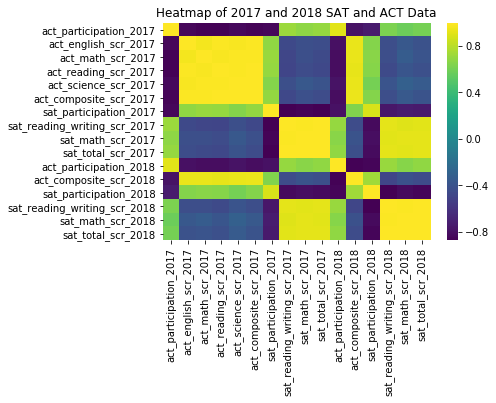

In [221]:
#Creating heatmap using Seaborn:
sns.heatmap(act_sat_2017_2018.corr(), cmap = 'viridis') 
plt.title('Heatmap of 2017 and 2018 SAT and ACT Data')

#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 
#Got a bit of help with adding title from Anna Haas

Text(0.5, 1.0, 'Heatmap of 2017 and 2018 SAT and ACT Data')

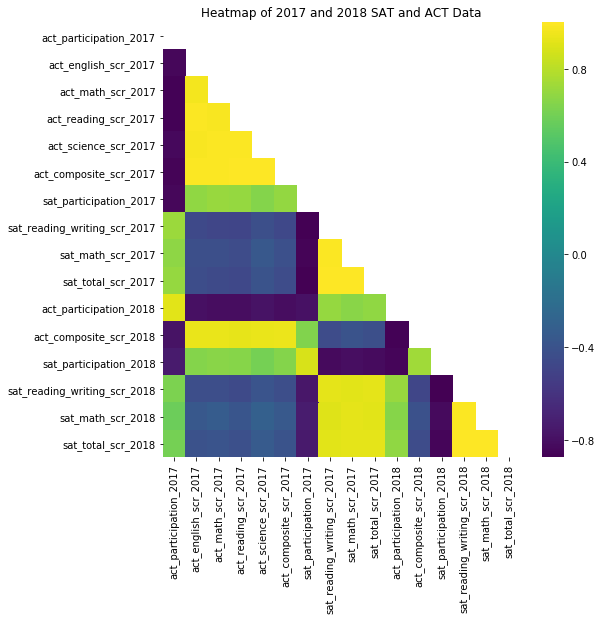

In [225]:
#Increasing figure size:
plt.figure(figsize=(8,8))

#Removing redundant parts of heat map (upper triangle): 

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(act_sat_2017_2018.corr())

mask[np.triu_indices_from(mask)] = True

sns.heatmap(act_sat_2017_2018.corr(), mask=mask, cmap = 'viridis') 
plt.title('Heatmap of 2017 and 2018 SAT and ACT Data')
#Used lesson by Kiefer Katovich (SF) with minor updates by David Yerrington (SF):
#http://localhost:8799/notebooks/2.04-lesson-eda/basic-eda-walkthrough.ipynb 
#Got a bit of help with adding title from Anna Haas

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [366]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure have enough rows
    fig, ax = plt.subplots(nrows = nrows, ncols = 2, sharey=True) # (I decided to go with pre-set figsize)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle(list_of_titles) #Setting title for group of plots
    ax[0].set_ylabel('Count (Frequency)') #Setting y-axis label for subplot i
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins = 10, edgecolor = 'black') # used settings (chose to use 10 bins)
        ax[i].set_xlabel(list_of_xlabels[i]) #Setting x-axis label for subplot i  
        #ax[i].set_ylabel('Count (Frequency)') #decided to only label left plot's y-axis but left this for reference  
    fig.tight_layout() #this helped to increase space between subplot histograms
    plt.subplots_adjust(top=0.9) #this helped to increase space between the title and the subplot histograms

#Sources used to write function:
#Used the link above (https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) 
#as well as the following link to format plots as desired:
#https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle
#https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots
#https://stackoverflow.com/questions/42741687/python-histogram-outline

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

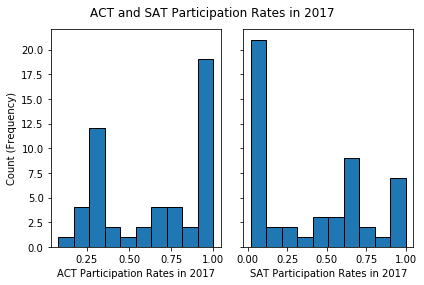

In [364]:
#Plotting participation rates for SAT & ACT 2017
subplot_histograms(dataframe = act_sat_2017_2018, 
                   list_of_columns = ['act_participation_2017', 'sat_participation_2017'],
                   list_of_titles = 'ACT and SAT Participation Rates in 2017',
                   list_of_xlabels = ['ACT Participation Rates in 2017', 'SAT Participation Rates in 2017'] )


In [347]:
#Checking work:
#plt.hist(act_sat_2017_2018['act_participation_2017'])
#plt.hist(act_sat_2017_2018['sat_participation_2017'])

It appears that in 2017, there were significantly more states that had 90-100% participation in the ACT than the SAT.  The SAT also had significantly more states with 0-10% participation than the ACT.

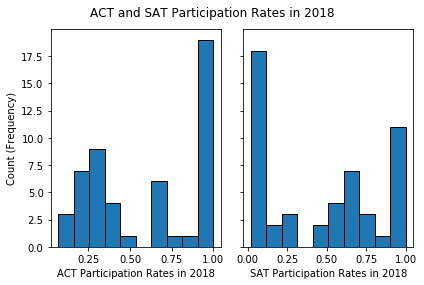

In [348]:
#Plotting participation rates for SAT & ACT 2018
subplot_histograms(dataframe = act_sat_2017_2018, 
                   list_of_columns = ['act_participation_2018', 'sat_participation_2018'],
                   list_of_titles = 'ACT and SAT Participation Rates in 2018',
                   list_of_xlabels = ['ACT Participation Rates in 2018', 'SAT Participation Rates in 2018'] ) 

It appears that in 2018, there were significantly more states that had 90-100% participation in the ACT than the SAT.  The SAT also had significantly more states with 0-10% participation than the ACT.
It's interesting that the SAT appears to have had more states with 50-90% participation than the ACT in 2018.

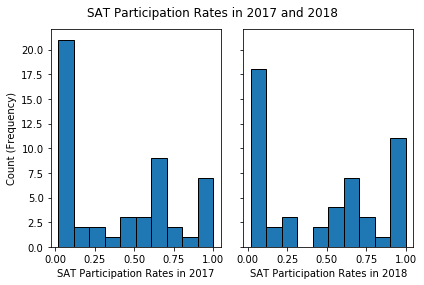

In [349]:
#Plotting participation rates for SAT in 2017 and 2018
subplot_histograms(dataframe = act_sat_2017_2018, 
                   list_of_columns = ['sat_participation_2017', 'sat_participation_2018'],
                   list_of_titles = 'SAT Participation Rates in 2017 and 2018',
                   list_of_xlabels = ['SAT Participation Rates in 2017', 'SAT Participation Rates in 2018'] )  

It looks like in 2018 there were less states with 0-10% participation in the SAT and more states with 50-90% and 90-100% participation in the SAT then in 2017.

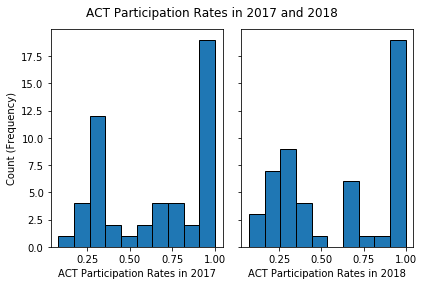

In [350]:
#Plotting participation rates for ACT in 2017 and 2018
subplot_histograms(dataframe = act_sat_2017_2018, 
                   list_of_columns = ['act_math_scr_2017', 'sat_math_scr_2017'],
                   list_of_titles = '2017 State Average ACT and SAT 2017 and 2018',
                   list_of_xlabels = ['ACT Participation Rates in 2017', 'ACT Participation Rates in 2018'] ) 

It looks like in 2018 there were more states with 0-50% participation, less states with 50-90% participation, and about the same number of states with 90-100% participation than in 2017.

In [ ]:
#Comparing 2017 and 2018 ACT and SAT math scores   

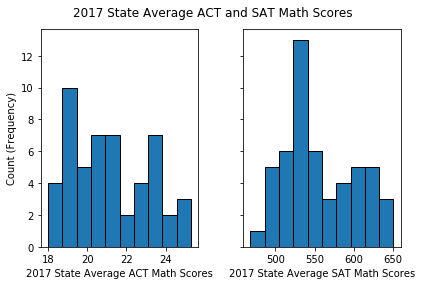

In [353]:
#Plotting state average math scores for 2017 ACT and SAT 
subplot_histograms(dataframe = act_sat_2017_2018, 
                   list_of_columns = ['act_math_scr_2017', 'sat_math_scr_2017'],
                   list_of_titles = '2017 State Average ACT and SAT Math Scores',
                   list_of_xlabels = ['2017 State Average ACT Math Scores', '2017 State Average SAT Math Scores'] )

It appears that the 2017 state average ACT math scores are a bit more irregularly distributed while the 2017 state average SAT math scores are more bimodally distributed.

Note that 2018 state average ACT math scores and 2018 state average SAT math scores could not be compared because 2018 ACT math scores were not given for this project. 

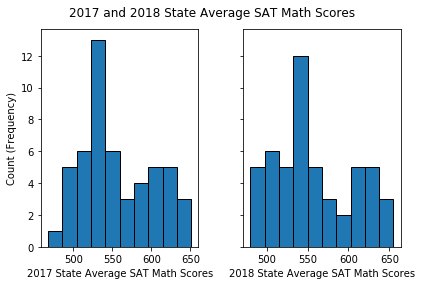

In [355]:
#Plotting state average math scores for 2017 SAT and 2018 SAT 
subplot_histograms(dataframe = act_sat_2017_2018, 
                   list_of_columns = ['sat_math_scr_2017', 'sat_math_scr_2018'],
                   list_of_titles = '2017 and 2018 State Average SAT Math Scores',
                   list_of_xlabels = ['2017 State Average SAT Math Scores', '2018 State Average SAT Math Scores'] )

It appears that 2017 state average SAT math scores were bimodally distributed while 2018 state average SAT math scores were less bimodally distributed (and it appears that there were more state average math scores between 475-500 points and less state average math scores between 575-600 points in 2018 than in 2017). 

Note that 2017 and 2018 state average ACT math scores could not be compared because 2018 ACT math scores were not given for this project. 

In [ ]:
#Plotting state average reading/verbal scores for 2017 and 2018 SAT and ACT

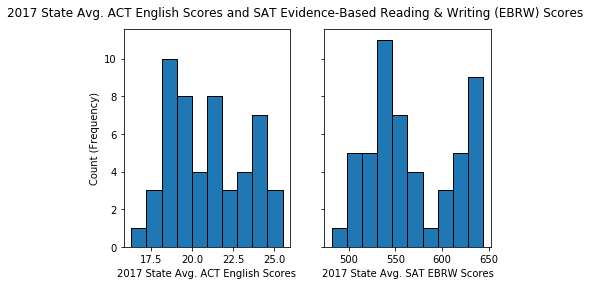

In [360]:
#Plotting 2017 state average ACT English scores and SAT Evidence-Based Reading and Writing scores 
subplot_histograms(dataframe = act_sat_2017_2018, 
                   list_of_columns = ['act_english_scr_2017', 'sat_reading_writing_scr_2017'],
                   list_of_titles = '2017 State Avg. ACT English Scores and SAT Evidence-Based Reading & Writing (EBRW) Scores',
                   list_of_xlabels = ['2017 State Avg. ACT English Scores', '2017 State Avg. SAT EBRW Scores'] )


It appears that 2017 state average ACT English scores approached a bimodal distribution while 2017 Evidence-Based Reading and Writing scores approached something between a normal and bimodal distribution.

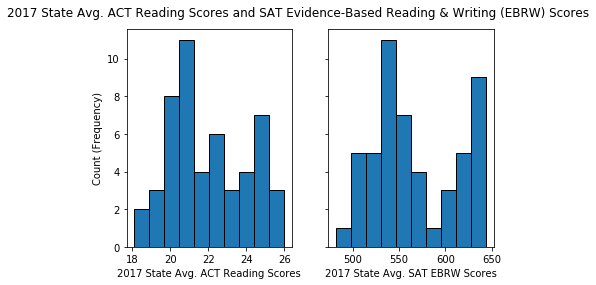

In [361]:
#Plotting 2017 state average ACT Reading scores and SAT Evidence-Based Reading and Writing scores 
subplot_histograms(dataframe = act_sat_2017_2018, 
                   list_of_columns = ['act_reading_scr_2017', 'sat_reading_writing_scr_2017'],
                   list_of_titles = '2017 State Avg. ACT Reading Scores and SAT Evidence-Based Reading & Writing (EBRW) Scores',
                   list_of_xlabels = ['2017 State Avg. ACT Reading Scores', '2017 State Avg. SAT EBRW Scores'] )


It appears that 2017 state average ACT reading scores approached a bimodal distribution while 2017 Evidence-Based Reading and Writing scores approached something between a normal and bimodal distribution.

Note that 2018 state average ACT English and Reading scores could not be compared to 2018 state average Evidence-Based Reading and Writing scores because 2018 state average ACT English and Reading scores were not given for this project. 

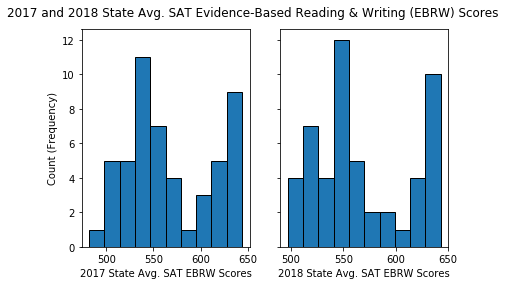

In [362]:
#Plotting 2017 and 2018 state average Evidence-Based Reading and Writing SAT scores 
subplot_histograms(dataframe = act_sat_2017_2018, 
                   list_of_columns = ['sat_reading_writing_scr_2017', 'sat_reading_writing_scr_2018'],
                   list_of_titles = '2017 and 2018 State Avg. SAT Evidence-Based Reading & Writing (EBRW) Scores',
                   list_of_xlabels = ['2017 State Avg. SAT EBRW Scores', '2018 State Avg. SAT EBRW Scores'] )


It appears that 2017 and 2018 Evidence-Based Reading and Writing (EBRW) scores approached something between normal and bimodal distributions.  It looks like in 2018, more state average ERBW scores were between 500 and 525 points than in 2017, and there were less state average ERBW scores between around 560 and 580 points than in 2017. 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [396]:
def subplot_scatter_plots(dataframe, list_of_columns_x, list_of_columns_y, 
                          list_of_titles, list_of_xlabels, list_of_ylabels, fig_size):
    nrows = int(np.ceil(len(list_of_columns_x)/2)) # Makes sure have enough rows 
    #(assuming length of list_of_columns_x = length of list_of_columns_y)
    fig, ax = plt.subplots(nrows = nrows, ncols = 2, figsize = fig_size) # Decided need to be able to adj fig size
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i in range(0, len(list_of_columns_x)): 
        #for x_i, y_i in zip(list_of_columns_x, list_of_columns_y): # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[list_of_columns_x[i]], dataframe[list_of_columns_y[i]]) # can add more settings
        ax[i].set_title(list_of_titles[i]) #Setting title for each plot
        ax[i].set_xlabel(list_of_xlabels[i]) #Setting x-axis label for subplot i  
        ax[i].set_ylabel(list_of_ylabels[i]) #Setting y-axis label for subplot i 
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) #this helped to increase space between subplot scatter plots
    plt.subplots_adjust(top=0.9) #this helped to increase space between the title and the subplot scatter plots

#Chose to keep scatter plots simple (not a lot of different colors and symbols used)

#Sources used to write function:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
#https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
#Used the link above (https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)
#https://matplotlib.org/users/tight_layout_guide.html
#as well as the following link to format plots as desired:
#https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle
#https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots
#https://stackoverflow.com/questions/42741687/python-histogram-outline


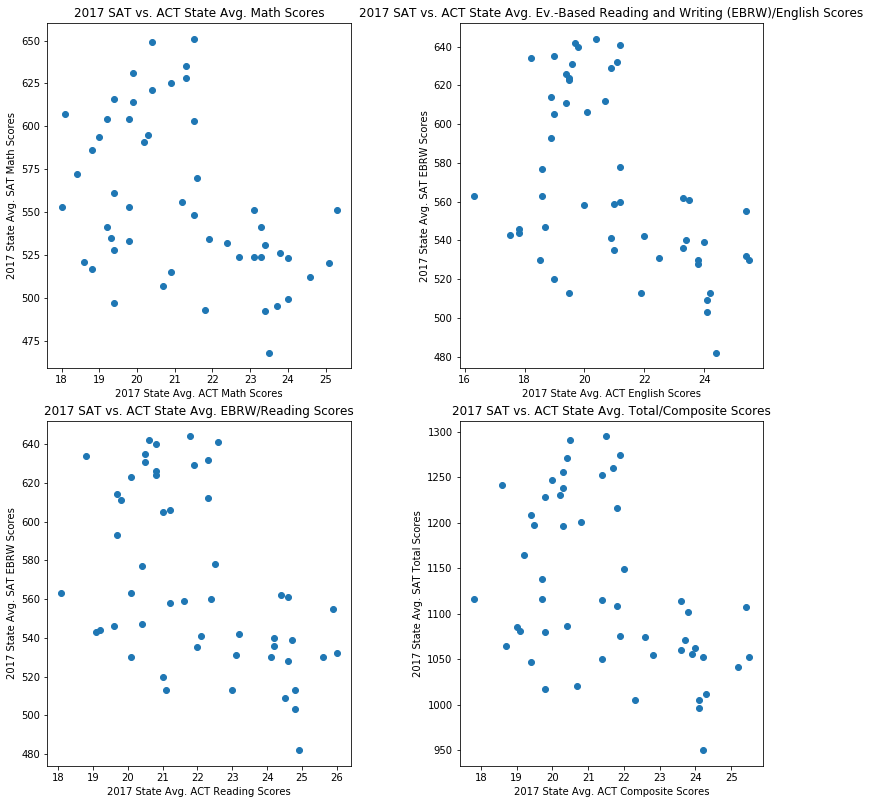

In [397]:
# SAT vs. ACT math scores for 2017, SAT vs. ACT verbal/reading scores for 2017 
#(looking at both English and reading scores for ACT in comparison to SAT Evidence-Based Reading and Writing (EBRW)
#scores), and SAT vs. ACT total/composite scores for 2017
subplot_scatter_plots(dataframe = act_sat_2017_2018, 
                      list_of_columns_x = ['act_math_scr_2017', 
                                           'act_english_scr_2017',
                                           'act_reading_scr_2017',
                                           'act_composite_scr_2017'],
                      list_of_columns_y = ['sat_math_scr_2017',
                                           'sat_reading_writing_scr_2017',
                                           'sat_reading_writing_scr_2017',
                                           'sat_total_scr_2017'],
                      list_of_titles = ['2017 SAT vs. ACT State Avg. Math Scores',
                                        '2017 SAT vs. ACT State Avg. Ev.-Based Reading and Writing (EBRW)/English Scores',
                                        '2017 SAT vs. ACT State Avg. EBRW/Reading Scores',
                                        '2017 SAT vs. ACT State Avg. Total/Composite Scores'],
                      list_of_xlabels = ['2017 State Avg. ACT Math Scores', 
                                         '2017 State Avg. ACT English Scores',
                                         '2017 State Avg. ACT Reading Scores',
                                         '2017 State Avg. ACT Composite Scores'],
                      list_of_ylabels = ['2017 State Avg. SAT Math Scores',
                                         '2017 State Avg. SAT EBRW Scores',
                                         '2017 State Avg. SAT EBRW Scores',
                                         '2017 State Avg. SAT Total Scores'],
                     fig_size = (12,12))


The scatter plots above show that there is not much of a correlation (or linear relationship) between 2017 state average SAT math scores and ACT math scores, between 2017 state average SAT Evidence-Based Reading and Writing (EBRW) scores and ACT English scores, between 2017 state average SAT EBRW scores and ACT reading scores, and between 2017 state average SAT total scores and ACT composite scores.  It appears that, for all of the plots, there were not many data points at the lower extreme values for both axes and at the higher extreme values for both axes.

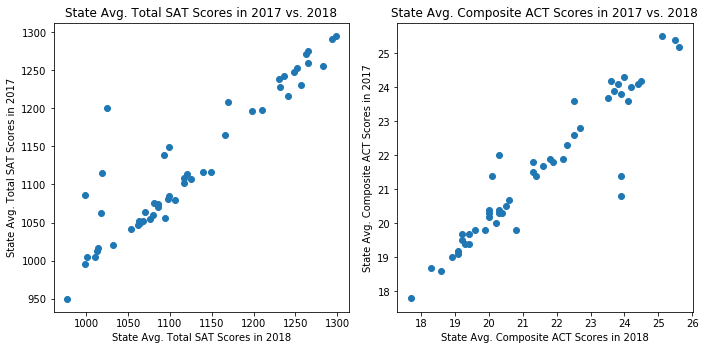

In [401]:
# Total scores for SAT 2017 vs. 2018 and composite scores for ACT 2017 vs. 2018
subplot_scatter_plots(dataframe = act_sat_2017_2018, 
                      list_of_columns_x = ['sat_total_scr_2018', 
                                           'act_composite_scr_2018'],
                      list_of_columns_y = ['sat_total_scr_2017', 
                                           'act_composite_scr_2017'],
                      list_of_titles = ['State Avg. Total SAT Scores in 2017 vs. 2018',
                                        'State Avg. Composite ACT Scores in 2017 vs. 2018'],
                      list_of_xlabels = ['State Avg. Total SAT Scores in 2018', 
                                         'State Avg. Composite ACT Scores in 2018'],
                      list_of_ylabels = ['State Avg. Total SAT Scores in 2017', 
                                         'State Avg. Composite ACT Scores in 2017'],
                     fig_size = (10,5))

The scatter plots above show that there is a pretty strong linear relationship between state average total SAT scores in 2017 and state average total SAT scores in 2018, and there is an arguably strong linear relationship between state average composite ACT scores in 2017 and state average composite ACT scores in 2018.  

It appears that as state average total SAT scores in 2018 increase, state average total SAT scores in 2017 increase.  This means that the distribution of state average total SAT scores changed from 2017 to 2018 but not enough to make the state average total SAT scores in 2017 vs. state average total SAT scores in 2018 scatter plot not linear. 

It appears that as state average composite ACT scores in 2018 increase, state average composite ACT scores in 2017 increase.  This means that the distribution of state average composite ACT scores changed from 2017 to 2018 but not enough to make the state average composite ACT scores in 2017 vs. state average composite ACT scores in 2018 scatter plot not linear. 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [491]:
#Reviewing columns of act_sat_2017_2018 dataframe
act_sat_2017_2018.columns

Index(['state', 'act_participation_2017', 'act_english_scr_2017',
       'act_math_scr_2017', 'act_reading_scr_2017', 'act_science_scr_2017',
       'act_composite_scr_2017', 'sat_participation_2017',
       'sat_reading_writing_scr_2017', 'sat_math_scr_2017',
       'sat_total_scr_2017', 'act_participation_2018',
       'act_composite_scr_2018', 'sat_participation_2018',
       'sat_reading_writing_scr_2018', 'sat_math_scr_2018',
       'sat_total_scr_2018'],
      dtype='object')

Text(0.5, 1.0, 'Comparing 2017 and 2018 ACT and SAT State Participation Rates')

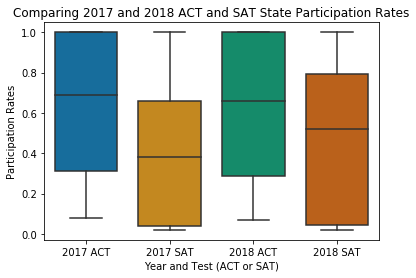

In [489]:
ax1 = sns.boxplot(x = ['2017 ACT', '2017 SAT', 
                       '2018 ACT', '2018 SAT'], #x-axis labels for each boxplot (column) 
            y = [ act_sat_2017_2018['act_participation_2017'], act_sat_2017_2018['sat_participation_2017'], 
                  act_sat_2017_2018['act_participation_2018'], act_sat_2017_2018['sat_participation_2018'] ],
                  #data for each boxplot
           width = .75, #decreasing width of each boxplot to be more visually appealing
           palette = 'colorblind', #using a color palette that helps colorblind people differentiate boxplots easier
           showfliers = True ) #trying to show outliers 

ax1.set_xlabel('Year and Test (ACT or SAT)') #setting x-axis label
ax1.set_ylabel('Participation Rates') #setting y-axis label
ax1.set_title('Comparing 2017 and 2018 ACT and SAT State Participation Rates') #setting plot title

#Note: not seeing outliers in boxplots below 
#Are there no outliers that are not contained within the boxplot whiskers?

#Sources:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
#https://stackoverflow.com/questions/35131798/tweaking-seaborn-boxplot
#https://python-graph-gallery.com/33-control-colors-of-boxplot-seaborn/
#http://seaborn.pydata.org/tutorial/color_palettes.html

Note: IQR = interquartile range

The boxplots above describe the distributions of participation rates for the ACT and SAT in 2017 and 2018.  It appears that the IQR of ACT participation rates has higher values than the IQR of SAT participation rates in both 2017 and 2018.  It appears that the median of ACT participation rates decreased while the median of SAT participation rates increased from 2017 to 2018. It is interesting that there are longer lower whiskers for ACT participation rates in 2017 and 2018 while there longer upper whiskers for SAT participation rates in 2017 and 2018.  It is also interesting that from 2017 to 2018, the SAT participation rate IQR increased in size (larger IQR).

Text(0.5, 1.0, 'Comparing 2017 State Average ACT Subject and Composite Scores')

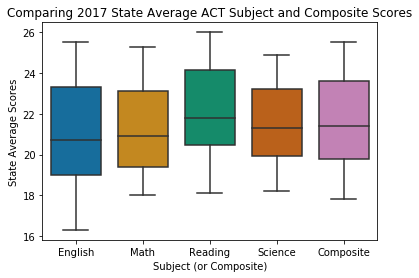

In [488]:
ax1 = sns.boxplot(x = ['English', 'Math', 
                 'Reading', 'Science', 'Composite'],  #x-axis labels for each boxplot (column)
            y = [ act_sat_2017_2018['act_english_scr_2017'], act_sat_2017_2018['act_math_scr_2017'], 
                  act_sat_2017_2018['act_reading_scr_2017'], act_sat_2017_2018['act_science_scr_2017'],
                  act_sat_2017_2018['act_composite_scr_2017'] ], #data for each boxplot
           width = .75, #decreasing width of each boxplot to be more visually appealing
           palette = 'colorblind', #using a color palette that helps colorblind people differentiate boxplots easier
           showfliers = True ) #trying to show outliers

ax1.set_xlabel('Subject (or Composite)') #setting x-axis label
ax1.set_ylabel('State Average Scores') #setting y-axis label
ax1.set_title('Comparing 2017 State Average ACT Subject and Composite Scores') #setting plot title
#Composite scores are included here because they are in an appropriate range for the plot, and
#it is interesting to look at subjects in comparison to composite score.

#Sources:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
#https://stackoverflow.com/questions/35131798/tweaking-seaborn-boxplot
#https://python-graph-gallery.com/33-control-colors-of-boxplot-seaborn/
#http://seaborn.pydata.org/tutorial/color_palettes.html

The boxplots above describe the distributions of state average ACT subject and composite scores in 2017.  It appears that the lowest state average ACT subject median score is the English score while the highest state average ACT subject median score is the reading score.  The box and whisker plots for each subject and the composite score look pretty similar, except the English and reading score IQR's (and their ranges including upper and lower whiskers, especially for the English score) are large compared to the other subjects.  

Text(0.5, 1.0, 'Comparing 2017 and 2018 State Average ACT Composite Scores')

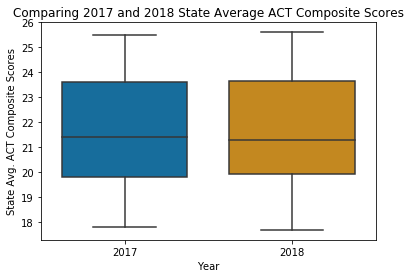

In [487]:
ax1 = sns.boxplot(x = ['2017', '2018'],  #x-axis labels for each boxplot (column)
            y = [ act_sat_2017_2018['act_composite_scr_2017'], act_sat_2017_2018['act_composite_scr_2018'] ],
                  #data for each boxplot
           width = .75, #decreasing width of each boxplot to be more visually appealing
           palette = 'colorblind', #using a color palette that helps colorblind people differentiate boxplots easier
           showfliers = True ) #trying to show outliers

ax1.set_xlabel('Year') #setting x-axis label
ax1.set_ylabel('State Avg. ACT Composite Scores') #setting y-axis label
ax1.set_title('Comparing 2017 and 2018 State Average ACT Composite Scores') #setting plot title

#Sources:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
#https://stackoverflow.com/questions/35131798/tweaking-seaborn-boxplot
#https://python-graph-gallery.com/33-control-colors-of-boxplot-seaborn/
#http://seaborn.pydata.org/tutorial/color_palettes.html

The boxplots above describe the distributions of state average ACT composite scores in 2017 and 2018.  The boxplots look very similar which shows that the tests were relatively similar from year to year (which is probably desired by ACT, Inc.).  It appears that in 2018, the IQR became slightly smaller on the lower end than in 2017, and the upper and lower whiskers are a bit longer than in 2017.  Perhaps students on the lower end performed a bit worse, and students on the higher end performed a bit better in 2018 than in 2017.  

Text(0.5, 1.0, 'Comparing 2017 and 2018 State Average SAT Subject Scores')

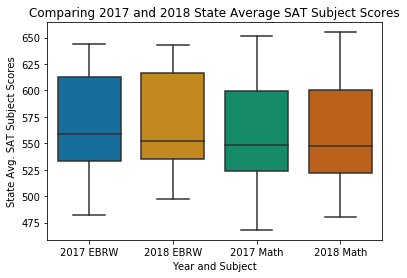

In [486]:
ax1 = sns.boxplot(x = ['2017 EBRW', '2018 EBRW', '2017 Math', '2018 Math'],  #x-axis labels for each boxplot (column)
            y = [ act_sat_2017_2018['sat_reading_writing_scr_2017'], act_sat_2017_2018['sat_reading_writing_scr_2018'],
                  act_sat_2017_2018['sat_math_scr_2017'], act_sat_2017_2018['sat_math_scr_2018']],
                  #data for each boxplot
           width = .75, #decreasing width of each boxplot to be more visually appealing
           palette = 'colorblind', #using a color palette that helps colorblind people differentiate boxplots easier
           showfliers = True ) #trying to show outliers

ax1.set_xlabel('Year and Subject') #setting x-axis label
ax1.set_ylabel('State Avg. SAT Subject Scores') #setting y-axis label
ax1.set_title('Comparing 2017 and 2018 State Average SAT Subject Scores') #setting plot title
#Note that EBRW (Evidence-Based Reading and Writing) has been defined earlier, so it will not be defined in this 
#plot
#Total SAT scores are not included here because they would shift the plot which would make detail about subject
#scores less easily visible

#Sources:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
#https://stackoverflow.com/questions/35131798/tweaking-seaborn-boxplot
#https://python-graph-gallery.com/33-control-colors-of-boxplot-seaborn/
#http://seaborn.pydata.org/tutorial/color_palettes.html      


The boxplots above describe the distributions of state average SAT subject scores in 2017 and 2018.  There appears to be more variation in state average SAT math scores than in state average EBRW scores (based on the length of the upper and lower whiskers on the boxplots).    

It appears that the EBRW median decreased from 2017 to 2018, the IQR moved up a bit from 2017 to 2018, and the upper and lower whiskers became shorter from 2017 to 2018.  This means the high-performing states did pretty well in 2018, but there may have been more slighly lower (but not terribly lower) performing state average scores in 2018.

It appears that the math median and the IQR did not significantly change from 2017 to 2018.  The upper whisker length increased while the lower whisker length decreased from 2017 to 2018.  This means that high-performing states and lower-performing states did better in 2018 than in 2017.

Text(0.5, 1.0, 'Comparing 2017 and 2018 State Average SAT Total Scores')

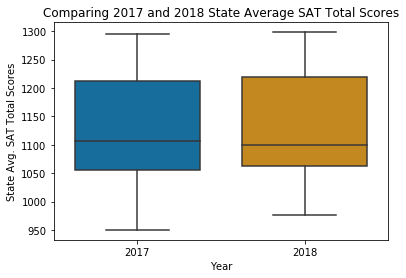

In [485]:
ax1 = sns.boxplot(x = ['2017', '2018'],  #x-axis labels for each boxplot (column)
            y = [ act_sat_2017_2018['sat_total_scr_2017'], act_sat_2017_2018['sat_total_scr_2018'] ],
                  #data for each boxplot
           width = .75, #decreasing width of each boxplot to be more visually appealing
           palette = 'colorblind', #using a color palette that helps colorblind people differentiate boxplots easier
           showfliers = True ) #trying to show outliers

ax1.set_xlabel('Year') #setting x-axis label
ax1.set_ylabel('State Avg. SAT Total Scores') #setting y-axis label
ax1.set_title('Comparing 2017 and 2018 State Average SAT Total Scores') #setting plot title

#Sources:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
#https://stackoverflow.com/questions/35131798/tweaking-seaborn-boxplot
#https://python-graph-gallery.com/33-control-colors-of-boxplot-seaborn/
#http://seaborn.pydata.org/tutorial/color_palettes.html 

The boxplots above describe the distributions of state average SAT total scores in 2017 and 2018.  It appears that the median state average SAT total score decreased from 2017 to 2018. It appears that high-performing states did better in 2018 than in 2017 based on the slight upward shift of the IQR and the upper whisker.  It appears that the lower-performing states did better in 2018 than in 2017 based on the shorter length and higher minimum boundary of the lower whisker in 2018 (than in 2017).  

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [ ]:
#I think a line plot would be helpful if we had more temporal data (for example, if we had data from 2016 to 2018).
#Otherwise, I think the plots above describe the data and trends well.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [ ]:
#Unfortunately I struggled with generating these choropleth maps using Tableau.  I would love to review this with a
#global or local instructor.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:  I decided to summarize the underlying distributions for each variable using histrograms below (but more descriptions can be seen using different plots and visualizations above).

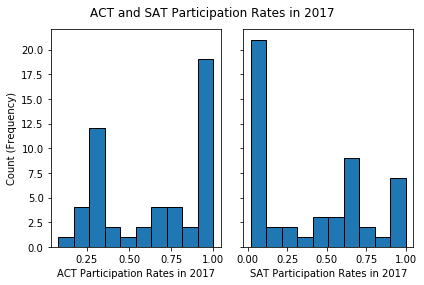

In [492]:
#Plotting participation rates for SAT & ACT 2017
subplot_histograms(dataframe = act_sat_2017_2018, 
                   list_of_columns = ['act_participation_2017', 'sat_participation_2017'],
                   list_of_titles = 'ACT and SAT Participation Rates in 2017',
                   list_of_xlabels = ['ACT Participation Rates in 2017', 'SAT Participation Rates in 2017'] )

The histrograms above show that both the ACT participation rates in 2017 and the SAT participation rates in 2017 data do not have normal distributions.  

The ACT participation rates in 2017 distribution has a large count of rates at ~90%-100% participation (proportions of 0.9 - 1.0), but there are also a large count of rates at ~25%-35% participation (proportions of ~0.25-0.35).  It could be said that this distribution is left-skewed (resulting in a lower mean value than median value). 

The SAT participation rates in 2017 distribution has a large count of participation rates at ~0%-15% participation, but there are also large counts of participation rates at ~60%-70% and ~90%-100%.  It could be said that this distribution is right-skewed (resulting in a higher mean value than median value).

Below, see the means and medians discussed above.

In [507]:
print(act_sat_2017_2018['act_participation_2017'].mean())
print(act_sat_2017_2018['act_participation_2017'].median())
print(act_sat_2017_2018['sat_participation_2017'].mean())
print(act_sat_2017_2018['sat_participation_2017'].median())

0.6525490196078431
0.69
0.39803921568627454
0.38


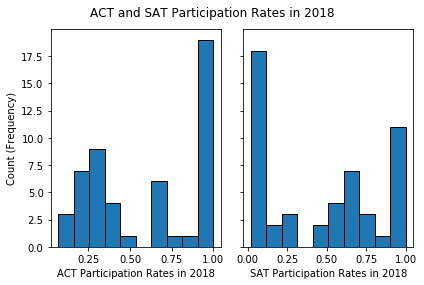

In [493]:
#Plotting participation rates for SAT & ACT 2018
subplot_histograms(dataframe = act_sat_2017_2018, 
                   list_of_columns = ['act_participation_2018', 'sat_participation_2018'],
                   list_of_titles = 'ACT and SAT Participation Rates in 2018',
                   list_of_xlabels = ['ACT Participation Rates in 2018', 'SAT Participation Rates in 2018'] )

The histrograms above show that both the ACT participation rates in 2018 and the SAT participation rates in 2018 data do not have normal distributions.  

The ACT participation rates in 2018 distribution has a large count of rates at ~90%-100% participation (proportions of 0.9 - 1.0), but there are also a large count of rates at ~25%-35% participation (proportions of ~0.25-0.35).  It could be said that this distribution is left-skewed (resulting in a lower mean value than median value). 

The SAT participation rates in 2018 distribution has a large count of participation rates at ~0%-15% participation, but there are also large counts of participation rates at ~60%-70% and ~90%-100%.  It could be said that this distribution is right-skewed (this would result in a higher mean value than median value if there were not so many participation rates at ~0%-15%).

Below, see the means and medians discussed above.

In [508]:
print(act_sat_2017_2018['act_participation_2018'].mean())
print(act_sat_2017_2018['act_participation_2018'].median())
print(act_sat_2017_2018['sat_participation_2018'].mean())
print(act_sat_2017_2018['sat_participation_2018'].median())

0.6164705882352941
0.66
0.46627450980392143
0.52


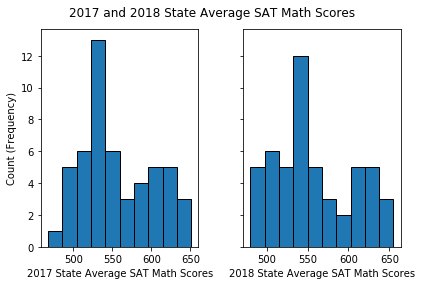

In [495]:
#Plotting state average math scores for 2017 and 2018 SAT
subplot_histograms(dataframe = act_sat_2017_2018, 
                   list_of_columns = ['sat_math_scr_2017','sat_math_scr_2018'],
                   list_of_titles = '2017 and 2018 State Average SAT Math Scores',
                   list_of_xlabels = ['2017 State Average SAT Math Scores', '2018 State Average SAT Math Scores'] )

The histrograms above show that both the state average SAT math scores in 2017 and 2018 have relatively bimodal distributions.  Both distributions have high count/frequency of scores from ~500 to ~600 points.  There is a high count/frequency of values from ~600 to ~650 points which creates a right-skew of both of the distributions (resulting in a higher mean value than median value for both distributions).

Below, see the means and medians discussed above.

In [509]:
print(act_sat_2017_2018['act_math_scr_2017'].mean())
print(act_sat_2017_2018['act_math_scr_2017'].median())
print(act_sat_2017_2018['sat_math_scr_2018'].mean())
print(act_sat_2017_2018['sat_math_scr_2018'].median())

21.182352941176468
20.9
557.2549019607843
547.0


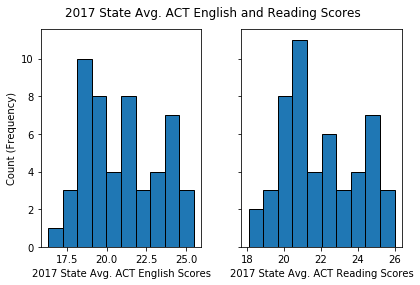

In [496]:
#Plotting 2017 state average ACT English and reading scores 
subplot_histograms(dataframe = act_sat_2017_2018, 
                   list_of_columns = ['act_english_scr_2017', 'act_reading_scr_2017'],
                   list_of_titles = '2017 State Avg. ACT English and Reading Scores',
                   list_of_xlabels = ['2017 State Avg. ACT English Scores', '2017 State Avg. ACT Reading Scores'] )

The histrograms above show that both the state average ACT English and reading scores in 2017 have relatively bimodal distributions (the reading scores more so than the English scores).  Both distributions have high count/frequency of scores from ~18 to ~23 points.  There is a high count/frequency of values from ~23 to ~26 points which creates a right-skew of both of the distributions (resulting in a higher mean value than median value for both distributions).

Below, see the means and medians discussed above.

In [511]:
print(act_sat_2017_2018['act_english_scr_2017'].mean())
print(act_sat_2017_2018['act_english_scr_2017'].median())
print(act_sat_2017_2018['act_reading_scr_2017'].mean())
print(act_sat_2017_2018['act_reading_scr_2017'].median())

20.931372549019606
20.7
22.013725490196077
21.8


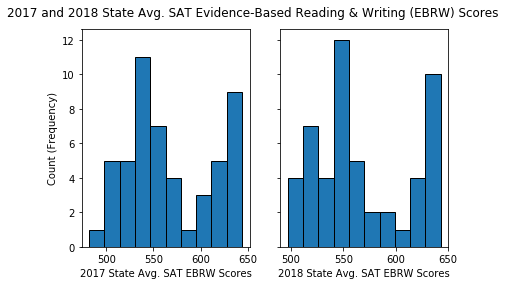

In [497]:
#Plotting 2017 and 2018 state average Evidence-Based Reading and Writing SAT scores 
subplot_histograms(dataframe = act_sat_2017_2018, 
                   list_of_columns = ['sat_reading_writing_scr_2017', 'sat_reading_writing_scr_2018'],
                   list_of_titles = '2017 and 2018 State Avg. SAT Evidence-Based Reading & Writing (EBRW) Scores',
                   list_of_xlabels = ['2017 State Avg. SAT EBRW Scores', '2018 State Avg. SAT EBRW Scores'] )

The histrograms above show that both the state average SAT Evidence-Based Reading and Writing (EBRW) scores in 2017 and 2018 have distributions that are between normal and bimodal distributions.  Both distributions have high count/frequency of scores from ~500 to ~580 points.  There is a high count/frequency of values from ~600 to ~650 points which creates a right-skew in both of the distributions (resulting in a higher mean value than median value for both distributions).

Below, see the means and medians discussed above.

In [512]:
print(act_sat_2017_2018['sat_reading_writing_scr_2017'].mean())
print(act_sat_2017_2018['sat_reading_writing_scr_2017'].median())
print(act_sat_2017_2018['sat_reading_writing_scr_2018'].mean())
print(act_sat_2017_2018['sat_reading_writing_scr_2018'].median())

569.1176470588235
559.0
567.2941176470588
552.0


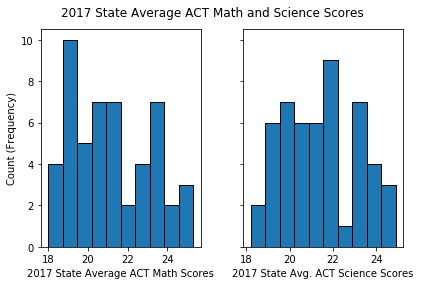

In [498]:
#Plotting state average math and science scores for the 2017 ACT 
subplot_histograms(dataframe = act_sat_2017_2018, 
                   list_of_columns = ['act_math_scr_2017', 'act_science_scr_2017'],
                   list_of_titles = '2017 State Average ACT Math and Science Scores',
                   list_of_xlabels = ['2017 State Average ACT Math Scores', '2017 State Avg. ACT Science Scores'] )

The histrograms above show that both the state average ACT math and science scores in 2017 have distributions that are between normal and bimodal distributions.  

The distribution of the state average ACT math scores has a high count/frequency of scores from ~18 to ~21.5 points with a very high count at ~18.5 to ~ 19.5 points.  There is also a high count/frequency of values from ~22.5 to ~25.5 points which creates a right-skew in the distribution (resulting in a higher mean value than median value).

The distribution of the state average ACT science scores has a high count/frequency of scores from ~18 to ~22.5 points.  There is also a high count/frequency of values from ~23.5 to ~25.5 points which creates a right-skew in the distribution (resulting in a higher mean value than median value).

Below, see the means and medians discussed above.

In [513]:
print(act_sat_2017_2018['act_math_scr_2017'].mean())
print(act_sat_2017_2018['act_math_scr_2017'].median())
print(act_sat_2017_2018['act_science_scr_2017'].mean())
print(act_sat_2017_2018['act_science_scr_2017'].median())

21.182352941176468
20.9
21.45098039215686
21.3


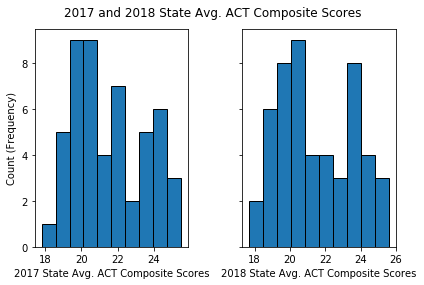

In [501]:
#Plotting 2017 and 2018 state average ACT composite scores 
subplot_histograms(dataframe = act_sat_2017_2018, 
                   list_of_columns = ['act_composite_scr_2017', 'act_composite_scr_2018'],
                   list_of_titles = '2017 and 2018 State Avg. ACT Composite Scores',
                   list_of_xlabels = ['2017 State Avg. ACT Composite Scores', '2018 State Avg. ACT Composite Scores'])

The histrograms above show that both the state average ACT composite scores in 2017 and 2018 have relatively bimodal distributions (the ACT composite scores in 2018 more so than in 2017).  Both distributions have high count/frequency of scores from ~18.5 to ~22.5 points.  There is a high count/frequency of values from ~23 to ~26 points which creates a right-skew of both of the distributions (resulting in a higher mean value than median value for both distributions).

Below, see the means and medians discussed above.

In [514]:
print(act_sat_2017_2018['act_composite_scr_2017'].mean())
print(act_sat_2017_2018['act_composite_scr_2017'].median())
print(act_sat_2017_2018['act_composite_scr_2018'].mean())
print(act_sat_2017_2018['act_composite_scr_2018'].median())

21.519607843137255
21.4
21.498039215686273
21.3


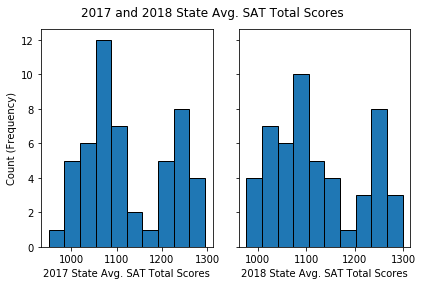

In [502]:
#Plotting 2017 and 2018 state average SAT total scores 
subplot_histograms(dataframe = act_sat_2017_2018, 
                   list_of_columns = ['sat_total_scr_2017', 'sat_total_scr_2018'],
                   list_of_titles = '2017 and 2018 State Avg. SAT Total Scores',
                   list_of_xlabels = ['2017 State Avg. SAT Total Scores', '2018 State Avg. SAT Total Scores'])

The histrograms above show that both the state average SAT total scores in 2017 and 2018 have relatively bimodal distributions.  Both distributions have high count/frequency of scores from ~1000 to ~1150 points.  There is a high count/frequency of values from ~1200 to ~1300 points which creates a right-skew of both of the distributions (resulting in a higher mean value than median value for both distributions).

Below, see the means and medians discussed above.

In [515]:
print(act_sat_2017_2018['sat_total_scr_2017'].mean())
print(act_sat_2017_2018['sat_total_scr_2017'].median())
print(act_sat_2017_2018['sat_total_scr_2018'].mean())
print(act_sat_2017_2018['sat_total_scr_2018'].median())

1126.0980392156862
1107.0
1124.6666666666667
1099.0


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: Yes, we observe this trend of sampling population normality if enough values are taken (sampled) from the population and averaged and if enough sample averages are collected, according to the Central Limit Theorem.  See below for more information.  

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: (see below)

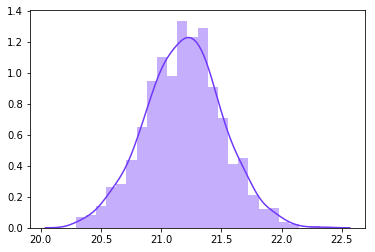

In [519]:
#Generating 1000 values which are means of 35 samples from act_math_scr_2017:
norm_act_math_scr_2017 = [np.mean(np.random.choice(
                          act_sat_2017_2018['act_math_scr_2017'], 35)) for _ in range(1000)]

#Plotting the 1000 values generated above to see if generated normal distribution (Central Limit Theorum):
sns.distplot(norm_act_math_scr_2017, color = '#7038F8');

#Source: Sam Stack, 
#http://localhost:8888/notebooks/Desktop/DSI-US-7/DEN-Flex/LabReviews/1.02-lab-distributions-1/
#starter-code-ReviewSam.ipynb

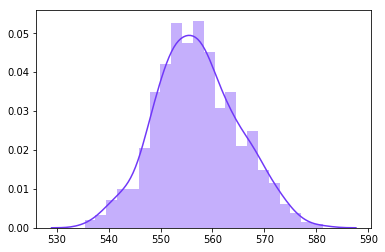

In [521]:
#Generating 1000 values which are means of 35 samples from sat_math_scr_2017:
norm_sat_math_scr_2017 = [np.mean(np.random.choice(
                          act_sat_2017_2018['sat_math_scr_2017'], 35)) for _ in range(1000)]

#Plotting the 1000 values generated above to see if generated normal distribution (Central Limit Theorum):
sns.distplot(norm_sat_math_scr_2017, color = '#7038F8');

#Source: Sam Stack, 
#http://localhost:8888/notebooks/Desktop/DSI-US-7/DEN-Flex/LabReviews/1.02-lab-distributions-1/
#starter-code-ReviewSam.ipynb

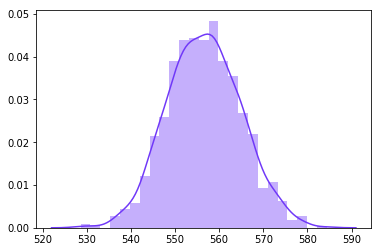

In [524]:
#Generating 1000 values which are means of 35 samples from sat_math_scr_2018:
norm_sat_math_scr_2018 = [np.mean(np.random.choice(
                          act_sat_2017_2018['sat_math_scr_2018'], 35)) for _ in range(1000)]

#Plotting the 1000 values generated above to see if generated normal distribution (Central Limit Theorum):
sns.distplot(norm_sat_math_scr_2018, color = '#7038F8');

#Source: Sam Stack, 
#http://localhost:8888/notebooks/Desktop/DSI-US-7/DEN-Flex/LabReviews/1.02-lab-distributions-1/
#starter-code-ReviewSam.ipynb

The plots above show that distributions of means of data sampled from state average ACT math scores in 2017, data sampled from state average SAT math scores in 2017, and data sampled from state average SAT math scores in 2018 approach normality due to the Central Limit Theorem (given a large enough sample size from a population (typically > 30 samples) and enough samples taken from the population, the distribution of the sample means will approach normality, and the mean of all of the samples from the population will be approximately equal to the mean of the population).  This means that estimates such as estimated means of the original populations can be estimated from the sample mean distributions as well.

Source: https://towardsdatascience.com/understanding-the-central-limit-theorem-642473c63ad8

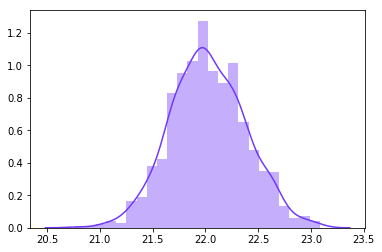

In [525]:
#Generating 1000 values which are means of 35 samples from act_reading_scr_2017:
norm_act_reading_scr_2017 = [np.mean(np.random.choice(
                          act_sat_2017_2018['act_reading_scr_2017'], 35)) for _ in range(1000)]

#Plotting the 1000 values generated above to see if generated normal distribution (Central Limit Theorum):
sns.distplot(norm_act_reading_scr_2017, color = '#7038F8');

#Source: Sam Stack, 
#http://localhost:8888/notebooks/Desktop/DSI-US-7/DEN-Flex/LabReviews/1.02-lab-distributions-1/
#starter-code-ReviewSam.ipynb

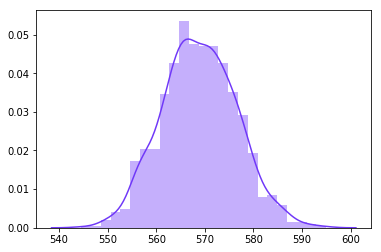

In [526]:
#Generating 1000 values which are means of 35 samples from sat_reading_writing_scr_2017:
norm_sat_reading_writing_scr_2017 = [np.mean(np.random.choice(
                          act_sat_2017_2018['sat_reading_writing_scr_2017'], 35)) for _ in range(1000)]

#Plotting the 1000 values generated above to see if generated normal distribution (Central Limit Theorum):
sns.distplot(norm_sat_reading_writing_scr_2017, color = '#7038F8');

#Source: Sam Stack, 
#http://localhost:8888/notebooks/Desktop/DSI-US-7/DEN-Flex/LabReviews/1.02-lab-distributions-1/
#starter-code-ReviewSam.ipynb

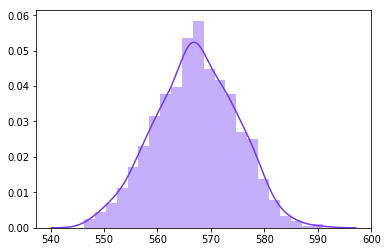

In [527]:
#Generating 1000 values which are means of 35 samples from sat_reading_writing_scr_2018:
norm_sat_reading_writing_scr_2018 = [np.mean(np.random.choice(
                          act_sat_2017_2018['sat_reading_writing_scr_2018'], 35)) for _ in range(1000)]

#Plotting the 1000 values generated above to see if generated normal distribution (Central Limit Theorum):
sns.distplot(norm_sat_reading_writing_scr_2018, color = '#7038F8');

#Source: Sam Stack, 
#http://localhost:8888/notebooks/Desktop/DSI-US-7/DEN-Flex/LabReviews/1.02-lab-distributions-1/
#starter-code-ReviewSam.ipynb

The plots above show that distributions of means of data sampled from state average ACT reading scores in 2017, data sampled from state average SAT Evidence-Based Reading and Writing (EBRW) scores in 2017, and data sampled from state average SAT EBRW scores in 2018 approach normality due to the Central Limit Theorem (given a large enough sample size from a population (typically > 30 samples) and enough samples taken from the population, the distribution of the sample means will approach normality, and the mean of all of the samples from the population will be approximately equal to the mean of the population).  This means that estimates such as estimated means of the original populations can be estimated from the sample mean distributions as well.

Source: https://towardsdatascience.com/understanding-the-central-limit-theorem-642473c63ad8

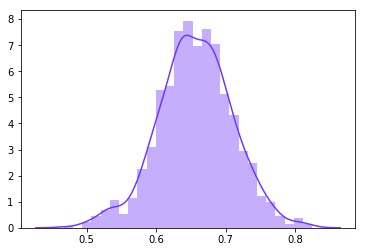

In [528]:
#Generating 1000 values which are means of 35 samples from act_participation_2017:
norm_act_participation_2017 = [np.mean(np.random.choice(
                          act_sat_2017_2018['act_participation_2017'], 35)) for _ in range(1000)]

#Plotting the 1000 values generated above to see if generated normal distribution (Central Limit Theorum):
sns.distplot(norm_act_participation_2017, color = '#7038F8');

#Source: Sam Stack, 
#http://localhost:8888/notebooks/Desktop/DSI-US-7/DEN-Flex/LabReviews/1.02-lab-distributions-1/
#starter-code-ReviewSam.ipynb

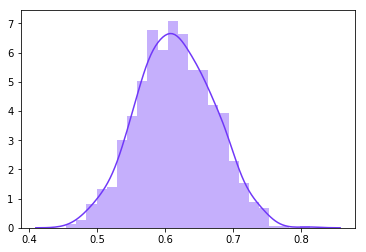

In [529]:
#Generating 1000 values which are means of 35 samples from act_participation_2018:
norm_act_participation_2018 = [np.mean(np.random.choice(
                          act_sat_2017_2018['act_participation_2018'], 35)) for _ in range(1000)]

#Plotting the 1000 values generated above to see if generated normal distribution (Central Limit Theorum):
sns.distplot(norm_act_participation_2018, color = '#7038F8');

#Source: Sam Stack, 
#http://localhost:8888/notebooks/Desktop/DSI-US-7/DEN-Flex/LabReviews/1.02-lab-distributions-1/
#starter-code-ReviewSam.ipynb

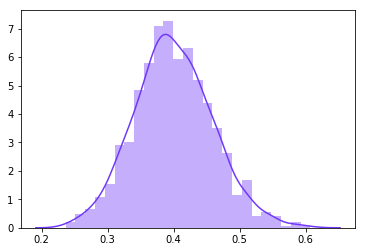

In [530]:
#Generating 1000 values which are means of 35 samples from sat_participation_2017:
norm_sat_participation_2017 = [np.mean(np.random.choice(
                          act_sat_2017_2018['sat_participation_2017'], 35)) for _ in range(1000)]

#Plotting the 1000 values generated above to see if generated normal distribution (Central Limit Theorum):
sns.distplot(norm_sat_participation_2017, color = '#7038F8');

#Source: Sam Stack, 
#http://localhost:8888/notebooks/Desktop/DSI-US-7/DEN-Flex/LabReviews/1.02-lab-distributions-1/
#starter-code-ReviewSam.ipynb

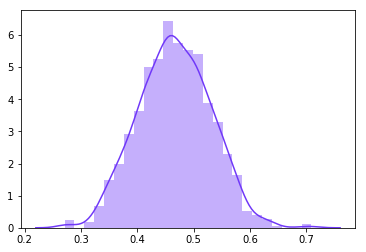

In [531]:
#Generating 1000 values which are means of 35 samples from sat_participation_2018:
norm_sat_participation_2018 = [np.mean(np.random.choice(
                          act_sat_2017_2018['sat_participation_2018'], 35)) for _ in range(1000)]

#Plotting the 1000 values generated above to see if generated normal distribution (Central Limit Theorum):
sns.distplot(norm_sat_participation_2018, color = '#7038F8');

#Source: Sam Stack, 
#http://localhost:8888/notebooks/Desktop/DSI-US-7/DEN-Flex/LabReviews/1.02-lab-distributions-1/
#starter-code-ReviewSam.ipynb

The plots above show that distributions of means of data sampled from state ACT participation rates in 2017 and 2018 and state SAT participation rates in 2017 and 2018 approach normality due to the Central Limit Theorem (given a large enough sample size from a population (typically > 30 samples) and enough samples taken from the population, the distribution of the sample means will approach normality, and the mean of all of the samples from the population will be approximately equal to the mean of the population).  This means that estimates such as estimated means of the original populations can be estimated from the sample mean distributions as well.

Source: https://towardsdatascience.com/understanding-the-central-limit-theorem-642473c63ad8

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:
It does not make sense to conduct statistical inference given the SAT and ACT participation rates in 2017 because there are only 51 values per data set, and these values are not samples randomly selected from a large population.  It would be nice to have a control group as well (such as ACT and SAT participation rates before the SAT format was changed in the spring of 2016).

Sources: 
http://www.stat.yale.edu/Courses/1997-98/101/sampinf.htm

General Assembly Lesson 2.06 by: Kiefer Katovich (SF), Matt Brems (DC), Justin Pounders (ATL)
http://localhost:8888/notebooks/Desktop/DSI-US-7/Lessons/2.06-lesson-statistical_inference_hypothesis_testing/starter-code.ipynb

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:
It is not appropriate to compare 2017 SAT math scores to 2017 ACT math scores because they are scored on different scales.  It would help to have a scaling factor that could be applied to these scores to allow for comparison of these values.  It would also help to have more math scores than state averages for the 2017 ACT and the 2017 SAT so scores could be randomly sampled (perhaps 1000 randomly sampled ACT math scores from one state 1000 randomly sampled SAT scores from the same state could be scaled and then compared).  It would be wise to compare 2017 and 2018 SAT and ACT math scores to math scores before the SAT format changed in the spring of 2016 as well. 

Sources: 
http://www.stat.yale.edu/Courses/1997-98/101/sampinf.htm

General Assembly Lesson 2.06 by: Kiefer Katovich (SF), Matt Brems (DC), Justin Pounders (ATL)
http://localhost:8888/notebooks/Desktop/DSI-US-7/Lessons/2.06-lesson-statistical_inference_hypothesis_testing/starter-code.ipynb

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
#See above (this statistical evaluation is not appropriate.)

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:
Georgia, Hawaii, and Iowa demonstrate interesting trends in their SAT and ACT participation rates.

Georgia:  It's interesting that in Georgia the SAT participation rate increased from 61% to 70% from 2017 to 2018, and the ACT participation rate decreased from 55% to 52% from 2017 to 2018.  The only state policies I could find for Georgia were that there is a requirement for students to take the Georgia Milestones test from 3rd grade through high school.  It looks like students do not have to take the ACT or SAT, and I find it surprising that Georgia has >50% participation in the ACT and SAT in 2017 and 2018.

Hawaii:  It's interesting that in Hawaii the SAT participation rate increased from 55% to 56% from 2017 to 2018, and the ACT participation rate decreased from 90% to 89% from 2017 to 2018.  I learned that the Hawaii State Department of Education (HIDOE) required that 11th graders take the ACT.  It's odd that even though students are required to take the ACT, the ACT participation rate has decreased from 2017 to 2018 and has not reached 100%; and, it's even more odd that the SAT participation rate increased from 2017 to 2018.

Iowa:  It's interesting that in Iowa the SAT participation rate increased from 2% to 3% from 2017 to 2018, and the ACT participation rate increased from 67% to 68% from 2017 to 2018.  The only state policies I could find for Iowa were that there is a requirement for students to take the Iowa Assessments from 3rd grade through 11th grade.  Iowa has a surprisingly low SAT participation rate, and the ACT participation rate could be better.  I wonder why Iowa does not require that students take the SAT or ACT like other states in the midwest such as Illinois.    

To see interesting trends in more detail, please see Project1_Presentation_JuliaTaussig.pdf

Sources:
ACT, Inc. http://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf 

College Board. https://reports.collegeboard.org/sat-suite-program-results/state-results 

Des Moines Public Schools.  https://www.dmschools.org/academics/iowa-assessments/ 

Edwards, Halle. https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows 

Gewertz, Catherine, https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html

Hawaii State Department of Education. http://www.hawaiipublicschools.org/ConnectWithUs/MediaRoom/PressReleases/Pages/2017-ACT-Results.aspx 

https://www.google.com/search?q=sat+picture&source=lnms&tbm=isch&sa=X&ved=0ahUKEwj4zeTFxPHgAhWwna0KHdC5D9YQ_AUIDigB&biw=1200&bih=537#imgrc=rMvwPmFb_wXDqM:

Sundquist, Kate. https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/ 

Woods, Richard. http://www.gadoe.org/Curriculum-Instruction-and-Assessment/Assessment/Pages/Georgia-Milestones-Assessment-System.aspx 


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Based on exploration of the data, my key takeaway is that state legislation can help to significantly increase SAT and/or ACT participation.  As ACT or SAT participation rates increase, average state ACT or SAT scores can decrease.  I would recommend that if states find ACT and SAT participation rates important, it would be beneficial to require or to at least fund and hold test days at schools.  Even if an increase in ACT or SAT participation rate increases the variety of students who take the tests and may decrease state average scores, it is great to provide opportunities to students to take the ACT and SAT and then to focus on increasing state average scores in the long run.

For example, Iowa has one of the lowest SAT participation rates (and decent but not great ACT participation rates).  Iowa also has the third highest average SAT score (probably because most of the students who take the SAT are students who care about college admission and take both the ACT and SAT).  Students in Iowa are required to take the Iowa Assessments from 3rd grade to 11th grade.  I recommend that the College Board (the organization that administers the SAT) work with the Iowa Board of Education to either require students (11th graders or graduating seniors) to take the SAT or to require the students to choose to take either the SAT or ACT).  This has been shown to help other states such as Illinois to approach or reach 100% SAT participation.  Another approach is to host test days at schools during which students can take the SAT at no expense to them. Test days or a requirement to take the SAT could provide opportunities to students from low-income families (or generally help students who may not have time or money to take the SAT outside of school hours).   

It would help to have the following data to better inform investigations:
 - Anonymous data for each student in each state to increase ability to conduct statistical inference 
 - Percentage of students who take the ACT and the SAT instead of one or the other (and percentage of students who take neither the SAT or ACT to verify data)
 - ACT and SAT participation rate and score data from more years (it would be interesting to see trends from 2000-2016 and then to see trends after the SAT format changed in the spring of 2016)
 - 2018 average state ACT subject scores (English, math, reading, and science scores)
 - Survey data about students' opinions about why they prefer to take the SAT, whether they prefer to take the ACT, why they prefer to take both the SAT and ACT, or why they prefer to take neither the SAT nor the ACT
 - Data regarding college and university ACT and/or SAT requirements 
 - Graduation rates for each state